# Домашние задания

- Звёздочкой (*) помечены необязательные (дополнительные) части/задания. Все задания в необязательной части являются необязательными
- В скобочках после каждой части и каждого задания написано максимальное количество баллов в формате (кол-во баллов за обязательные задания + кол-во баллов за дополнительные задания)
- Сумма баллов за обязательные задания равна 85. **В ноутбуке прописаны вторичные баллы, оценивание производится первичными баллами (из 12)**. Смотрите шкалу оценивания
- Если вы не можете сделать обязательное задание, то вам нужно выполнить дополнительных заданий (из любого дня) на удвоенную ценность обязательного задания. В таком случае, баллы за дополнительные задания делятся на два в переводе в первичные
В таком случае вам нужно будет явно указать, какие обязательные задания вы пропустили и какие дополнительные задания сделали вместо них

Шкала оценивания (перевода в баллы из вторичных в первичные)
- $\lfloor \text{вторичные баллы} / 7 \rfloor =$ первичные баллы
- За 85 вторичных баллов вы получаете **12 первичных баллов** - высшая оценка за курс

Оценивание будет происходить следующим образом:
- Вы заранее составляете табличку с тем, какие задания вы выполнили и считаете общее количество баллов
- Присылаете готовый ноутбук заранее. Дедлайн по отправке - 23:59 24.07.2024
- Приходите на защиту, где проверяющий случайно выберет несколько сделанных вами задания из заранее присланного ноутбука и попросит вас объяснить решение
- Затем вам могут задать несколько вопросов по теории с лекций или семинаров
- Если вы отвечаете удовлетворительно на все вопросы, вам ставится оценка, соответствующая общему количеству набранных вами баллов


**Дедлайн по отправке - 23:59 24.07.2024**


Это домашнее задание по материалам курса оптимизации, читаемого на студкемпе Яндекса по математике в ИИ.


- Домашнее задание выполняется в этом же Jupyter Notebook'e

- Файл необходимо переименовать: **NameSurname.ipynb** (без пробелов в начале и конце). Пример: **IvanIvanov.ipynb**

- Решение нужно отправлять на в телеграм своему семинаристу: [Дмитрию](https://t.me/flip_floppa) или [Роману](https://t.me/porludom)

- Для решения можно использовать Google Colab, и прислать ссылку на него

- Вместе с решением присылаете табличку, в которой отмечены, какие обязательные задания сделаны, какие дополнительные задания сделаны (и в счёт каких обязательных ои идут) и общее количество баллов


- Для вопросов используйте [Google Table](https://docs.google.com/spreadsheets/d/12kNEjELysBDXsEBb2WLjXaF5ZzJUi0ke-APZ8RjKNlc/edit?usp=sharing)

- Решение каждой задачи/пункта задачи поместите после условия

- Не забывайте добавлять необходимые пояснения и комментарии

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокомментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте)

- При полном запуске решения (Kernel --> Restart & Run All) все ячейки должны выполняться без ошибок

- Максимальный балл за задания - **178** (85 за обязательные + 93 за дополнительные)

Желаем успехов!

# Ссылки на задания по дням

- [Подготовка](#preparation)
- [Задания на день 1](#day1)
- [Задания на день 2](#day2)
- [Задания на день 3](#day3)
- [Задания на день 4](#day4)
- [Задания на день 5](#day5)

Для более подробного содержания (с ссылками так же на все задания) используйте __outline__ во вкладке __explorer__ (в панели слева) при использовании Visual Studio, или __содержание__ (в панели слева) при использовании колаба

# <a id='preparation'></a> Подготовка

Все необходимые импорты вынесены в самый верх ноутбука. Использование других библиотек не запрещается, но крайне не рекомендуется

In [1]:
import math
import time
import warnings
from functools import partial
from itertools import product
from typing import Callable, Iterator, Optional

import cvxpy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
from tqdm import tqdm

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# DEVICE = torch.device("cpu")
DEVICE

device(type='cpu')

## Построение графиков

Для удобства можете пользоваться следующей функцией для построения графиков

In [3]:
def moving_average(x, w):
    return scipy.signal.savgol_filter(x, w, min(3, w - 1))


def draw_plots(
    data: dict,
    plots: list[tuple[dict, dict]],
    title: str = "",
    row_plots: int = 2,
    plot_width: float = 8,
    plot_height: float = 4,
    use_common_legend: bool = True,
):
    num_plots = len(plots)
    row_plots = min(row_plots, num_plots)
    column_plots = math.ceil(num_plots / row_plots)

    fig, axs = plt.subplots(
        column_plots,
        row_plots,
        figsize=(plot_width * row_plots, plot_height * column_plots),
    )
    if len(title):
        fig.suptitle(title, fontsize=14)
    axs_list = [axs] if num_plots == 1 else list(axs.flat)
    for ax in axs_list:
        ax.grid()
        ax.set_visible(False)

    for ax, (p1, p2) in zip(axs_list, plots):
        ax.set_visible(True)

        x_label = p1.get("axis_name", p1["name"])
        y_label = p2.get("axis_name", p2["name"])
        if p1.get("log", False):
            ax.set_xscale("log")
            x_label = f"{x_label}, log scale"
        if p2.get("log", False):
            ax.set_yscale("log")
            y_label = f"{y_label}, log scale"

        ax.set_title(f"{p2['name']} over {p1['name']}")
        ax.set(xlabel=x_label, ylabel=y_label)

        scatter_all = p1.get("scatter", False) or p2.get("scatter", False)

        for method, method_data in data.items():
            label = method

            x_values = method_data[p1.get("ref", p1["name"])]
            y_values = method_data[p2.get("ref", p2["name"])]

            y_smooth_w = p2.get("smooth", 0)
            if y_smooth_w:
                y_smooth = moving_average(y_values, w=y_smooth_w)
                ax.fill_between(
                    x_values,
                    scipy.ndimage.minimum_filter1d(y_smooth, y_smooth_w),
                    scipy.ndimage.maximum_filter1d(y_smooth, y_smooth_w),
                    alpha=0.1,
                )
                y_values = y_smooth

            ax.plot(x_values, y_values, label=label)
            ax_color = ax.get_lines()[-1].get_color()
            if scatter_all:
                ax.scatter(x_values, y_values, s=15, color=ax_color)
            else:
                ax.scatter(x_values[-1], y_values[-1], s=15, color=ax_color)

    if use_common_legend:
        lines_labels = [axs_list[0].get_legend_handles_labels()]
        lines, labels = [sum(x, []) for x in zip(*lines_labels)]
        fig.legend(
            lines,
            labels,
            scatterpoints=1,
            markerscale=3,
            loc="outside lower center",
            ncol=min(6, len(data)),
            bbox_to_anchor=(0.5, -0.05 * (math.ceil(len(data) / 6) + 1)),
        )
    else:
        if len(data) > 1:
            for ax in axs_list:
                ax.legend()

    plt.tight_layout()
    plt.show()

## [MNIST](https://en.wikipedia.org/wiki/MNIST_database)

Датасет понадобится для выполнения некоторых заданий Дней 3 и 5

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
len(train_mnsit_seq)=2850, len(test_mnsit_seq)=150


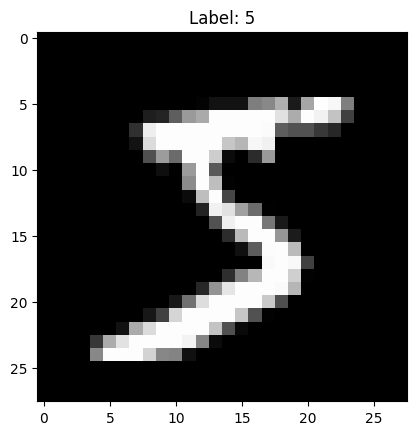

In [4]:
# скачиваем MNIST
MNIST(root="data/", download=True)
mnist_dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())
print(mnist_dataset)

# выведем первое изображение
image, label = mnist_dataset[0]
plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title(
    f"Label: {label}",
)

# будем использовать только часть данных
mnist_ratio = 0.05

# делим данные на test и train
train_mnsit_seq, test_mnsit_seq, _ = random_split(
    mnist_dataset,
    [0.95 * mnist_ratio, 0.05 * mnist_ratio, 1 - mnist_ratio],
    generator=torch.Generator().manual_seed(420),
)
print(f"{len(train_mnsit_seq)=}, {len(test_mnsit_seq)=}")

mnist_train_loader = DataLoader(train_mnsit_seq, 64, shuffle=True)
mnist_test_loader = DataLoader(test_mnsit_seq, 512, shuffle=False)

Создадим простую модель для экспериментов

In [5]:
class MnistModel(nn.Module):
    def __init__(self, input_dim: int = 28 * 28, output_dim: int = 10):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dim, output_dim),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        return self.net(x)

Полезные функции для тренировки и оценки на датасете MNIST

In [6]:
def train_mnist(
    model: nn.Module, optimizer: torch.optim.Optimizer, **loss_kwargs
) -> None:
    loss_fn = nn.CrossEntropyLoss()
    model.train()
    for inputs, labels in mnist_train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        output = model(inputs)
        loss = loss_fn(output, labels)
        loss.backward(**loss_kwargs)
        optimizer.step()


def eval_mnist(model: nn.Module) -> tuple[float, float]:
    loss_fn = nn.CrossEntropyLoss()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in mnist_test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_loss += loss_fn(outputs, labels).item()
    return val_loss, correct / total

## [CIFAR-10](https://paperswithcode.com/dataset/cifar-10)

Датасет понадобится для выполнения некоторых заданий Дня 4

Files already downloaded and verified
Files already downloaded and verified
len(cifar_train_dataset)=2500
len(cifar_test_dataset)=500


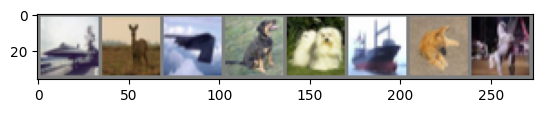

plane deer  plane dog   dog   ship  cat   horse


In [7]:
cifar_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# загружаем датасет
cifar_train_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=cifar_transform
)
cifar_test_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=cifar_transform
)

# будем использовать только часть данных
cifar_ratio = 0.05

# делим данные train и test
cifar_train_dataset, _ = random_split(
    cifar_train_dataset,
    [cifar_ratio, 1 - cifar_ratio],
    generator=torch.Generator().manual_seed(420),
)
cifar_test_dataset, _ = random_split(
    cifar_test_dataset,
    [cifar_ratio, 1 - cifar_ratio],
    generator=torch.Generator().manual_seed(420),
)

print(f"{len(cifar_train_dataset)=}")
print(f"{len(cifar_test_dataset)=}")

assert len(cifar_train_dataset) == 2500
assert len(cifar_test_dataset) == 500

cifar_train_loader = torch.utils.data.DataLoader(
    cifar_test_dataset, batch_size=64, shuffle=True
)

cifar_test_loader = torch.utils.data.DataLoader(
    cifar_test_dataset, batch_size=256, shuffle=False
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)


def imshow(image):
    image = image / 2 + 0.5  # де-нормализуем
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image, (1, 2, 0)))
    plt.show()


# несколько случайных элементов
images, labels = next(iter(cifar_train_loader))
images, labels = images[:8], labels[:8]

# выведем изображения
imshow(torchvision.utils.make_grid(images))

# выведем метки
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(8)))

In [8]:
class CifarNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

Создадим сложную модель ([ResNet](https://arxiv.org/abs/1512.03385)) для экспериментов

In [9]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    ]
    if pool:
        layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)


class ResNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super().__init__()

        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))

        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.classifier = nn.Sequential(
            nn.MaxPool2d(4), nn.Flatten(), nn.Linear(512, num_classes)
        )

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        return self.classifier(out)

In [10]:
def train_cifar(
    model: nn.Module, optimizer: torch.optim.Optimizer, **loss_kwargs
) -> None:
    loss_fn = nn.CrossEntropyLoss()
    model.train()
    for inputs, labels in cifar_train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        output = model(inputs)
        loss = loss_fn(output, labels)
        loss.backward(**loss_kwargs)
        optimizer.step()


def eval_cifar(model: nn.Module) -> tuple[float, float]:
    loss_fn = nn.CrossEntropyLoss()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        model.eval()  # evaluation mode
        for inputs, labels in cifar_test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_loss += loss_fn(outputs, labels).item()
    return val_loss, correct / total

# <a id='day1'></a> День 1 (10 + 38 баллов)

## Часть 1. Матрично-векторное дифференцирование (15 баллов)

### Задание 1 (6 баллов)

Вычислите градиенты $\nabla_A L, \nabla_b L$ функции ошибки $L$ для входных параметров $A,b$ соответсвенно. Градиент от параметра $x$ считается известным и равным $\nabla_x L$. Рекомендуется использовать алгоритм обратного распространения ошибки (backpropagation algorithm)

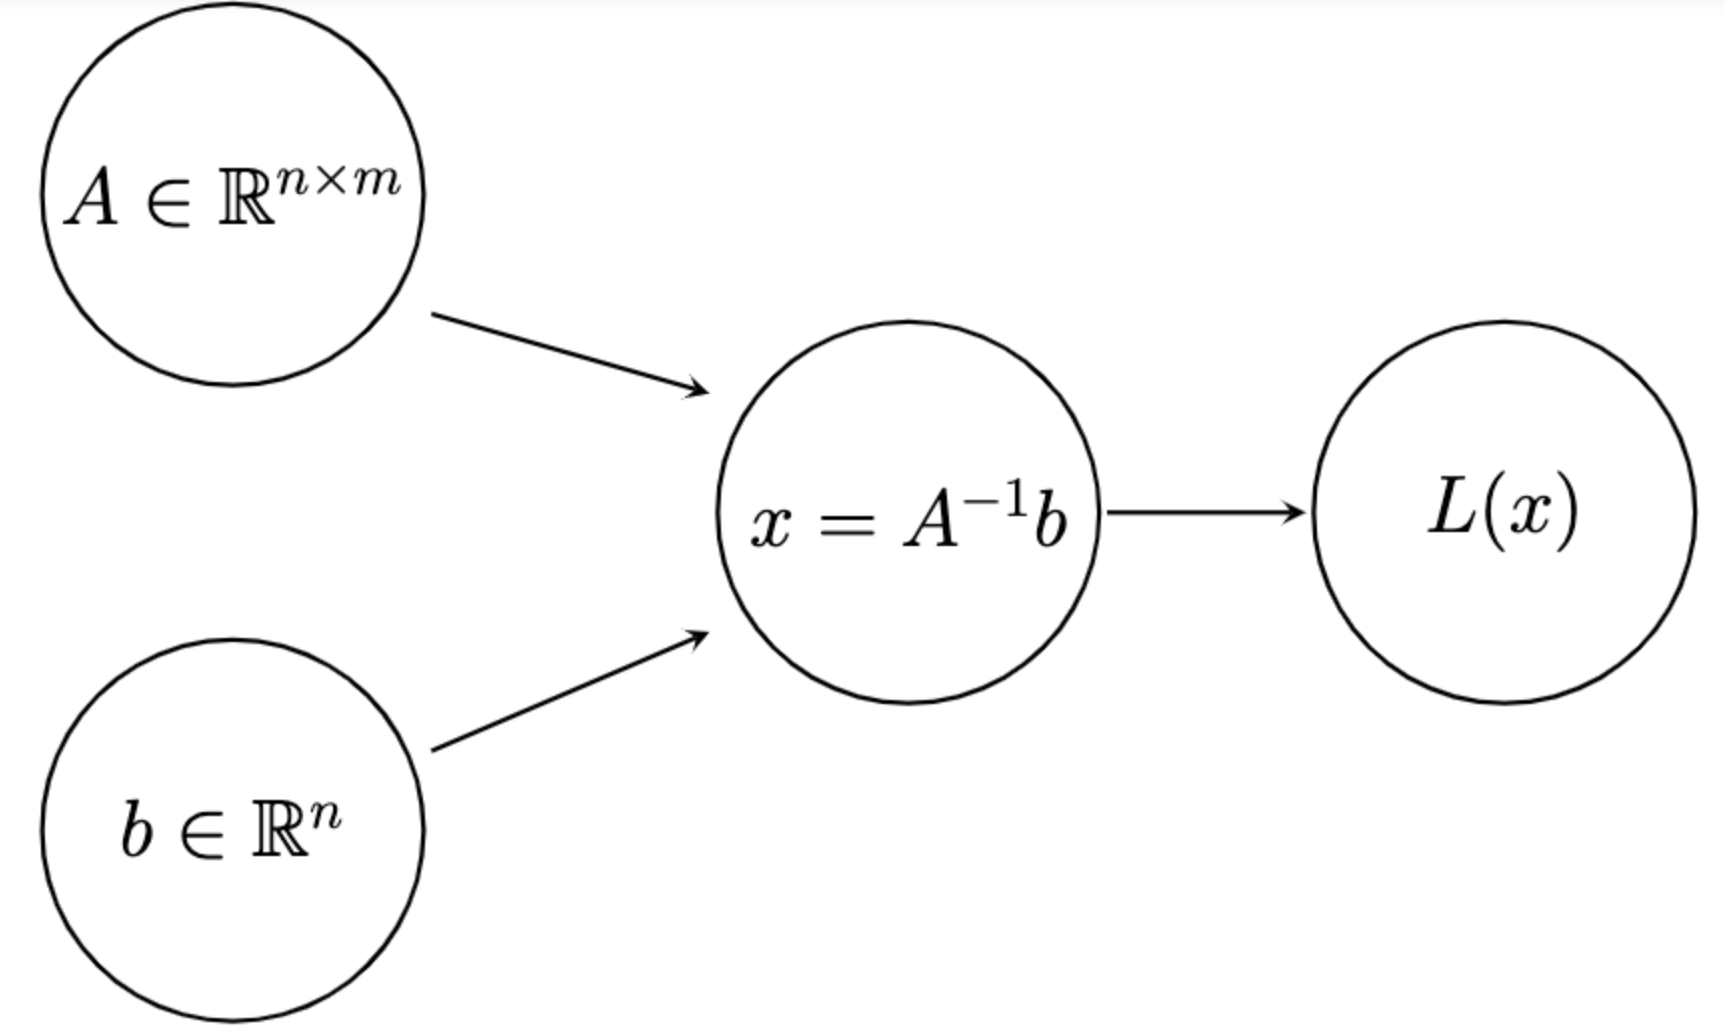


### Решение

Вычислим дифференциал L(x):
$$
dL = \langle \nabla_x L(x), dx \rangle = \langle \nabla_x L(x), d(A^{-1}b) \rangle = \langle \nabla_x L(x), d(A^{-1})b + A^{-1}db \rangle
= \langle \nabla_x L(x), d(A^{-1})b \rangle + \langle \nabla_x L(x), A^{-1}db \rangle
$$
Теперь отдельно распишем левое слагаемое:
$$
\langle \nabla_x L(x), d(A^{-1})b \rangle = \left\{ d(A^{-1}) = -A^{-1} dA A^{-1} \right\} = \langle \nabla_x L(x), A^{-1} dA A^{-1} b \rangle = \langle A^{-T} \nabla_x L(x) (A^{-1} b)^{T}, dA \rangle = \langle A^{-T} \nabla_x L(x) b^T A^{-T}, dA \rangle
$$
И правое слагаемое:
$$
\langle \nabla_x L(x), A^{-1}db \rangle = \langle A^{-T} \nabla_x L(x), db \rangle
$$
По определению градиента получили:
$$
\nabla_A L(x) = A^{-T} \nabla_x L(x) b^T A^{-T} \quad \nabla_b L(x) = A^{-T} \nabla_x L(x) \\
$$

### Задание 2 (4 балла)

Вычислите производную первого порядка для следующей функции $f : \mathbb{R}^d \setminus \{ 0 \} \to \mathbb{R}$ такой, что $\displaystyle f(x) = \langle x, x \rangle^{\langle x, x \rangle}$

### Решение

Преобразуем исходную $f$:
$$
\langle x, x \rangle ^ {\langle x, x \rangle} = \exp{({\langle x, x \rangle} \cdot \ln{{\langle x, x \rangle}})}
$$
Запишем ${\langle x, x \rangle}$ как $x^Tx$ ну и начем:
$$
f'(x) = \exp{({\langle x, x \rangle} \cdot \ln{{\langle x, x \rangle}})} \cdot \frac{1}{dx}\left(({\langle x, x \rangle} \cdot \ln{{\langle x, x \rangle}})\right)
$$

$$
f'(x) = \exp{({\langle x, x \rangle} \cdot \ln{{\langle x, x \rangle}})} \cdot \left(\frac{1}{x^Tx} \cdot x^Tx \cdot 2x + \ln{(x^Tx) \cdot 2x}\right)
$$

Сократим и преобразуем $f'(x)$:
$$
f'(x) = 2x \cdot \exp{({\langle x, x \rangle} \cdot \ln{{\langle x, x \rangle}})} \cdot \left(1 + \ln{(x^Tx)}\right) = 2x \cdot \langle x, x \rangle ^ {\langle x, x \rangle} \cdot \left(1 + \ln{(x^Tx)}\right)
$$

### Задание 3* (5 баллов)

Вычислите производную **второго** порядка для функции из предыдущего задания $f : \mathbb{R}^d \setminus \{ 0 \} \to \mathbb{R}$ такой, что $\displaystyle f(x) = \langle x, x \rangle^{\langle x, x \rangle}$

### Решение

$$
\frac{\partial f}{\partial x}=\langle x,x\rangle ^{\langle x,x\rangle }\cdot 2x(1+\ln\langle x,x\rangle )
$$

$$
\frac{\partial ^2 f}{\partial x^2}=\frac{\partial f}{\partial x}⋅
2x(1+\ln\langle x,x\rangle )+f(x)\cdot \frac{\partial (2x(1+\ln\langle x,x\rangle )}{\partial x}
$$

$$
\frac{\partial 2x(1+\ln\langle x,x\rangle )}{\partial x}=2I(1+\ln\langle x,x\rangle )+
2x\cdot \frac1{\langle x,x\rangle }\cdot \frac{\langle2x,\partial x\rangle }{\partial x}=
2I(1+\ln\langle x,x\rangle )+\frac{4xx^T}{\langle x,x\rangle }
$$

$$
\frac{\partial ^2 f}{\partial x^2}=
\langle x,x\rangle ^{\langle x,x\rangle }\cdot 2x(1+\ln\langle x,x\rangle )
\cdot 2x^T(1+\ln\langle x,x\rangle )+
\langle x,x\rangle ^{\langle x,x\rangle }
2I(1+\ln\langle x,x\rangle )+\frac{4xx^T}{\langle x,x \rangle}
$$


## Часть 2*. Выпуклость (33 балла)

### Задание 1 (4 балла)

Проверьте, что множество $S = \{ x_1 \in \mathbb{R}, x_2 \in \mathbb{R} \mid x_1 > 0, x_2 > 0, x_1 x_2 \geq 1 \}$ является выпуклым

### Решение

Берём 2 произвольные точки $x$, $y$ из $S$ и строим вектор с координатами 
$z=(tx_1+(1-t)y_1;tx_2+(1-t)y_2)$, $t\in[0;1]$.

Нужно проверить, что $z_1z_2 \geq 1$. Пусть $x_1>x_2$, $y_1>y_2$.

$$
t^2x_1x_2+t(1-t)x_2y_1+t(1-t)x_1y_2+(1-t)^2y_1y_2\geq1
$$

$$
t^2x_1x_2+t(1-t)x_2y_1+t(1-t)x_1y_2+(1-t)^2y_1y_2\geq
t^2+(1-t)^2+(1-t)t+(1-t)t=t^2+2t(1-t)+(1-t)^2=(t+(1-t))^2=1
$$

Получаем

$$
z_1z_2\geq1
$$

Из этого следует, что $z\in S \Rightarrow$ множество выпукло.

### Задание 2 (4 балла)

Проверьте, что множество $S = \{ x \in \mathbb{R}^d \mid x_1 \leq x_2 \leq \ldots \leq x_d \}$ является выпуклым


### Решение

Берём 2 произвольные точки $x$, $y$ из $S$ и строим вектор с координатами $z=(tx_1+(1-t)y_1;tx_2+(1-t)y_2, \dots, tx_n+(1-t)y_n)$, $t\in[0;1]$.

Нужно проверить, что $z_1 \leq z_2 \leq \ldots \leq z_d$. 

$$
tx_1+(1-t)y_1\leq tx_2+(1-t)y_2\leq\dots\leq tx_n+(1-t)y_n
$$

Умножим
$$
x_1 \leq x_2 \leq \ldots \leq x_d
$$
на $t$

$$
tx_1 \leq tx_2 \leq \ldots \leq tx_d
$$


Умножим
$$
y_1 \leq y_2 \leq \ldots \leq y_d
$$
на $1-t$

$$
(1-t)y_1 \leq (1-t)y_2 \leq \ldots \leq (1-t)y_d
$$

И сложим их
$$
tx_1+(1-t)y_1\leq tx_2+(1-t)y_2\leq \dots\leq tx_n+(1-t)y_n
$$


### Задание 3 (7 баллов)

Проверьте, что множество $S = \{ x \in \mathbb{R}^d \mid  \| x - a\|_2 \leq \| x - b\|_2 \}$, где $a\neq b \in \mathbb{R}^d$ and $\| \cdot \|_2$ - Евклидова норма ($\| x \|^2_2 = x^T x$), является выпуклым

### Решение


$$
|| x - a\|_2^2 \leq \| x - b\|_2^2
$$

$$
(x-a)^T(x-a)\leq (x-b)^T(x-b)
$$

$$
x^Tx-x^Ta-a^Tx+a^Ta\leq
x^Tx-x^Tb-b^Tx+b^Tb
$$

$$
x^Tx-2a^Tx+a^Ta\leq x^Tx-2b^Tx+b^Tb
$$
$$
2(b-a)^T\leq b^Tb-a^Ta
$$
$$
(b-a)^Tx\leq \frac{b^Tb-a^Ta}2
$$

Возьмём произвольные $x$, $y \in S$ и точку $z$ между ними $z=tx+(a-t)y$, $t\in[0;1]$.

$$
(b-a)^Tz=(b-a)^T(tx+(1-t)y)=
b^Ttx+b^T(1-t)y-a^Ttx-a^T(1-t)y=
$$
$$
=b^Ttx+b^T(1-t)y-a^Ttx-a^T(1-t)y=
$$
$$
t(b-a)^Tx+(b-a)^T(1-t)y\leq
t\frac{b^Tb-a^Ta}2+(1-t)\frac{b^Tb-a^Ta}2=\frac{b^Tb-a^Ta}2
$$


<!-- Берём $x$, $y$ из $S$. Они удовлетворяют

$$
|| x - a\|_2 \leq \| x - b\|_2
$$
и
$$
|| y - a\|_2 \leq \| y - b\|_2.
$$

Они эквивалентны
$$
\sqrt{\sum(x_i-a_i)^2}\leq\sqrt{\sum(x_i-b_i)^2}
$$
и
$$
\sqrt{\sum(y_i-a_i)^2}\leq\sqrt{\sum(y_i-b_i)^2}.
$$

Берём точку $tx+(1-t)y$, $t\in[0;1]$ и проверим

$$
|| tx+(1-t)y - a\|_2 \leq \| tx+(1-t)y - b\|_2.
$$

$$
a=ta+(1-t)a
$$
$$
b=tb+(1-t)b
$$
и подставляем, после вынесения за скобки получаем
$$
||t(x-a)+(1-t)(y-a)||\leq
||t(x-b)+(1-t)(y-b)||
$$
Раскроем норму по определению
$$
\sqrt{\sum(t(x_i-a_i)+(1-t)(y_i-a_i))^2}\leq
\sqrt{\sum(t(x_i-b_i)+(1-t)(y_i-b_i))^2}
$$
Возведём в квадрат
$$
\left|\sum(t(x_i-a_i)+(1-t)(y_i-a_i))^2\right|\leq
\left|\sum(t(x_i-b_i)+(1-t)(y_i-b_i))^2\right|
$$

$$
\sum(t(x_i-a_i)+(1-t)(y_i-a_i))^2\leq
\sum(t(x_i-b_i)+(1-t)(y_i-b_i))^2
$$

$$
\sum(t^2(x_i-a_i)^2+(1-t)^2(y_i-a_i)^2+2t(1-t)(x_i-a_i)(y_i-a_i))\leq
\sum(t^2(x_i-b_i)^2+(1-t)^2(y_i-b_i)^2+2t(1-t)(x_i-b_i)(y_i-b_i))
$$

Рассмотрим
$$
\sum((x_i-a_i)(y_i-a_i))\leq
\sum((x_i-b_i)(y_i-b_i))
$$

ТУТ ДОДЕЛАТЬ НУЖНО И ПРОВЕРИТЬ!!!



 -->


### Задание 4 (4 балла)

**Подсказка:** Возможно в этом задании (и возможно не только в нём) вам понадобятся следующие факты:

- дифференцируемая функция является выпуклой тогда и только тогда, когда

  $$
  \nabla^2 f(x) \geq 0 \quad \text{(Гессиан положительно полуопределён)}.
  $$

- дифференцируемая функция является $\mu$-сильно выпуклой тогда и только тогда, когда
  $$
  \nabla^2 f(x) \geq \mu I.
  $$

Проверьте, что функция $f: \mathbb{R}^2 \to \mathbb{R}$ такая, что $f(x) = x_1^2 x_2^2$, является выпуклой

### Решение

$$
\frac{\partial f}{\partial x_1}=2x_1x_2^2
$$
$$
\frac{\partial f}{\partial x_2}=2x_1^2x_2
$$
$$
\frac{\partial^2 f}{\partial x_1^2}=2x_2^2
$$
$$
\frac{\partial^2 f}{\partial x_2^2}=2x_1^2
$$
$$
\frac{\partial^2 f}{\partial x_1\partial x_2}=4x_1x_2
$$
$$
\frac{\partial^2 f}{\partial x_2\partial x_1}=4x_1x_2
$$
$$
det \left (
\begin{matrix}
2x_2^2 & 4x_1x_2 \\
4x_1x_2 & 2x_1^2
\end{matrix} \right ) = 4x_1^2x_2^2-16x_1^2x_2^2=-12x_1^2x_2^2
$$

Гессиан должен быть положительно полуопределён, что не выполняется в нашем случае. Следовательно, функция не является выпуклой.


### Задание 5 (4 балла)

Проверьте, что функция $f: \mathbb{R}^d \to \mathbb{R}$ такая, что $f(x) = \ | x \|^p$, где $p > 0$, является выпуклой

### Решение

$$
f(x)=||x||^p, \quad p>0
$$
$$
||.||=||.||_k=\sqrt[k]{\sum x_i^k}
$$
$$
\frac{\partial f}{\partial x}=p||x||_k^{p-1}\cdot\frac{\partial ||x||_k}{\partial x}=p||x||_k^{p-1}\cdot\frac1k\cdot \left(\sum x_i^k\right)^{\frac1k-1}\cdot kx_i^{k-1}=
$$
$$
=p||x||_k^{p-1}\cdot ||x||_k^{(1-k)}\cdot x_i^{k-1}=
p||x||_k^{p-k}x_i^{k-1}
$$

$$
\frac{\partial ^2 f}{\partial x^2}=p\left(
\frac{\partial ||x||_k^{p-k}}{\partial x}(x_i^{k-1})^T+||x||_k^{p-k}\cdot \frac{\partial x_i^{k-1}}{\partial x}
  \right)=
p\left(
(p-k)||x||_k^{p-2k}x^{k-1}(x^{k-1})^T+||x||_k^{p-k}\cdot (k-1)\cdot
x_i^{k-2}(x_i^{k-2})^T
  \right)
$$

$$
\frac{\partial ||x||_k^{p-k}}{\partial x}=(p-k)||x||_k^{p-k-1}\cdot \frac{\partial ||x||_k}{\partial x}=
(p-k)||x||_k^{p-k-1}\cdot \frac 1k\left(
\sum x_i^k
  \right)^{\frac 1k-1}\cdot kx_i^{k-1}=
$$
$$
(p-k)||x||_k^{p-k-1}\cdot x^{k-1}||x||_k^{1-x}=(p-k)||x||_k^{p-2k}\cdot x^{k-1}
$$



### Задание 6 (6 баллов)

Проверьте, что функция $f: \mathbb{R}^d \to \mathbb{R}$ такая, что
$
f(x) =  \frac{1}{n} \sum\limits_{i=1}^n l (g(x, a_i), b_i),
$
где $g(x, a) = x^T a$, $l(z,b) = \ln (1 + \exp(-bz))$, $a_i \in \mathbb{R}^d$, $b_i \in \{-1, 1\}$, является выпуклой


**Подсказка:** Попробуйте представить изначальную функцию как сумму двух функций, в одной из которых $b_i=1$, а в другой $b_i=-1$

### Решение

$$
f(x)=\frac1n\sum_{i=1}^n\ln(1+e^{-b_ix^Ta_i}), \qquad
a_i\in\mathbb R^d, \quad b_i\in\{-1;1\}
$$
Обозначим за $N_+$ множество индексов $i$, которым соответсвтует $b=1$, аналогично $N$ для индексов $i$, которым соответсвует $b=-1$.

$$
f_+(x)=\frac1n\sum_{i\in\mathbb N_+}\ln(1+e^{-x^Ta_i})
$$
$$
f_+(x)=\frac1n\sum_{i\in\mathbb N_-}\ln(1+e^{x^Ta_i})
$$
$$
\frac{\partial f_+}{\partial x}=\frac1n\sum_{i\in\mathbb N_+}\frac1{1+e^{-x^Ta_i}}\cdot (-a_i)\cdot e^{-x^Ta_i}=
$$
$$
=\frac1n\sum_{i\in\mathbb N_+}\frac{-a_ie^{-x^Ta_i}}{a+e^{-x^Ta_i}}
$$

$$
\frac{\partial^2 f_+}{\partial x^2}=\frac1n\sum_{i\in\mathbb N_+}
\frac{a_ia_i^Te^{-x^Ta_i}(1+e^{-x^Ta_i})+a_ie^{-x^Ta_i}\cdot (-a_i^T)e^{-x^Ta_i}}{(1+e^{-x^Ta_i})^2}=
$$
$$
=\frac1n\sum_{i\in\mathbb N_+}
\frac{a_ia_i^Te^{-x^Ta_i}(1+e^{-x^Ta_i}-e^{-x^Ta_i})}{(1+e^{-x^Ta_i})^2}=
$$
$$
=\frac1n\sum_{i\in\mathbb N_+}
\frac{a_ia_i^Te^{-x^Ta_i}}{(1+e^{-x^Ta_i})^2}
$$



$$
\frac{\partial f_-}{\partial x}=\frac1n\sum_{i\in\mathbb N_-}\frac1{1+e^{x^Ta_i}}\cdot a_i\cdot e^{x^Ta_i}=
$$
$$
=\frac1n\sum_{i\in\mathbb N_-}\frac{a_ie^{x^Ta_i}}{a+e^{x^Ta_i}}
$$

$$
\frac{\partial^2 f_-}{\partial x^2}=\frac1n\sum_{i\in\mathbb N_-}
\frac{a_ia_i^Te^{x^Ta_i}(1+e^{x^Ta_i})-a_ie^{x^Ta_i}\cdot a_i^Te^{x^Ta_i}}{(1+e^{x^Ta_i})^2}=
$$
$$
=\frac1n\sum_{i\in\mathbb N_-}
\frac{a_ia_i^Te^{x^Ta_i}(1+e^{x^Ta_i}-e^{-x^Ta_i})}{(1+e^{x^Ta_i})^2}=
$$
$$
=\frac1n\sum_{i\in\mathbb N_-}
\frac{a_ia_i^Te^{x^Ta_i}}{(1+e^{x^Ta_i})^2}
$$

Вторые частные производные положительно определённые значит, они выпуклые, а сумма выпуклых - выпуклая.

### Задание 7 (4 балла)

Докажите, что для всех $p, q \in \{ x \in \mathbb{R}^d \mid x_i \geq 0, \sum\limits_{i=1}^d x_i = 1\}$ справедливо следующее утверждение

$$
\sum_{i=1}^d \ln\left( \frac{p_i}{q_i}\right) p_i \geq 0.
$$


### Решение

$$
\{x\in\mathbb R \;|\;x_i\geq0,\sum x_i=1\}
$$
$$
\sum_{i=1}^d \ln\left(\frac{p_i}{y_i}\right)\geq0
$$
Вынесем степень из логарифма
$$
-\sum_{i=1}^d \ln\left(\frac{p_i}{y_i}\right)\geq0
$$
$$
\sum_{i=1}^d \ln\left(\frac {y_i}{p_i}\right)\leq 0
$$

Функция $f(x)=\ln x$ строго выпукла вверх на множестве положительных чисел. Используем неравенство Йенсена

$$
\sum_{i=1}^d\ln\left(\frac{y_i}{p_i} \right)p_i\leq 
\ln\left(
\sum_{i=1}^d\frac{y_i}{p_i}\cdot p_i
  \right)=\ln\left(
  \sum_{i=1}^dy_i\right)=\ln1=0
$$

# <a id='day2'></a> День 2 (45 + 19 баллов)

## Часть 1. Задача безусловной оптимизации (33 + 8 баллов)

Рассмотрим проблему минимизации эмпирического риска (empirical risk minimization, ERM)
$$
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
$$
где $\ell$ - функция ошибки, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ набор данных состоящий из признаков $x_i$ и значений $y_i$, $\lambda > 0$ - параметр регуляризации

Будем использовать линейную модель $g(w, x) = w^T x$ и логистическую (сигмоидальную) функцию ошибки: $\ell(z,y) = \ln (1 + \exp(-yz))$ (**Важно: $y$ должны принимать значения -1 или +1**). Получившуюся задачу обычно называют задачей логистической регрессией

### Задание 1 (9 баллов)

В этом задании вам нужно:

- Вычислить градиент и Гессиан для данной задачи
- Доказать, что задача является $\mu$-сильно выпуклой и имеет $L$-Липшецевый градиент с $\mu = \lambda$ и $L = \lambda + \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2$

### Решение

Имеем следующую функцию эмпирического риска: 
$$
f(w) = \frac{1}{n} \sum\limits_{i=1}^n \ln\left(1 + \exp (-y_i w^T x_i)\right) + \frac{\lambda}{2} \| w \|^2_2 .
$$
Градиент может быть найден с помощью покоординатного дифференцирования:
$$
\frac{\partial f(w)}{\partial w_k} = - \frac{1}{n} \sum\limits_{i=1}^n \frac{x_{ik} y_i \exp(-w^Tx_i y_i)}{1 + \exp(-w^Tx_iy_i)} + \lambda w_k
$$
$$
\nabla f(w) = \frac{1}{n}\sum\limits_{i=1}^n \frac{-y_i \exp(-y_i w^T x_i)}{1 + \exp(-y_i w^T x_i)} \cdot x_i  + \lambda w .
$$
Аналогично находится гессиан: 
$$
\nabla^2 f(w) = \frac{1}{n} \sum\limits_{i=1}^n \frac{\exp(-y_i w^Tx_i)}{(1 + \exp(-y_i w^Tx_i))^2} \cdot x_i(x_i)^T + \lambda I_d .
$$
Так как $\forall x_i \in \mathbb{R}^d \hookrightarrow x_i(x_i)^T \succeq 0$ и экспонента неотрицательна $\implies$ задача является сильно-выпуклой с константой $\mu = \lambda$ по критерию сильной-выпуклости. Найдем теперь константу Липшица из верхней оценки на гессиан. Для этого заметим, что для экспоненты выполнено следующее неравенство:
$$
\forall x \colon \frac{e^x}{(1 + e^x)^2} \leq \frac{1}{4}.
$$ 
Тогда, используя оценку $\lVert \nabla^2 f(w) \rVert_2^2 \leq 2L \lVert x - y \rVert_2^2$ и знание, что 2-норма $x_i (x_i)^T$ это максимальное собственное число 
$$
\nabla^2 f(w) \preccurlyeq \frac{1}{4n} \sum\limits_{i=1}^n x_i(x_i)^T + \lambda I_d \implies L = \lambda + \frac{1}{4n} \lambda_{max} \left(\sum\limits_{i=1}^n x_i(x_i)^T\right) .$$

### Задание 2 (4 балла)

К ноутбуку прилагается датасет *mushrooms.txt*. Так же его можно скачать по [ссылке](https://drive.google.com/file/d/1lgwawQxGD_6XruWbquMH6W2yKPVQ5kdi/view?usp=sharing)

In [11]:
# файл должен лежать в той же директории, что и ноутбук
dataset = "mushrooms.txt"

data = load_svmlight_file(dataset)
mushrooms_x, mushrooms_y = data[0].toarray(), data[1]

# сделаем y -1 или 1
mushrooms_y = 2 * mushrooms_y - 3

train_mush_x, test_mush_x, train_mush_y, test_mush_y = train_test_split(
    mushrooms_x, mushrooms_y, test_size=0.2, random_state=42
)

print(f"{train_mush_x.shape=}")
print(f"{train_mush_y.shape=}")

train_mush = list(zip(train_mush_x, train_mush_y))
test_mush = list(zip(test_mush_x, test_mush_y))

print(f"{len(train_mush)=}")
print(f"{len(test_mush)=}")

assert len(train_mush) == 6499
assert len(test_mush) == 1625

train_mush_x.shape=(6499, 112)
train_mush_y.shape=(6499,)
len(train_mush)=6499
len(test_mush)=1625


В этом задании вам нужно:
- Для тренировочной части `train_mush` оценить константу $L =  \frac{1}{4n} \sum\limits_{i=1}^n \| x_{i} \|^2_2 + \lambda$.
Возьмите $\lambda \approx L / 1000$
- Написать функцию для вычисления значения $f(w)$, градиента $\nabla f(w)$ и гессиана $\nabla^2 f(w)$. Функции должны принимать также параметры $x$ и $y$ (`train_mush_x`, `train_mush_y`)
- Проверить правильность функции для вычисления $f(w)$, используя функцию `assert_mush()`. Если проверка не проведена или провалена, **задание автоматически считается невыполненным**
- Написать функцию `mush_accuracy()`, которая бы считала точность предсказаний на тестовых данных `test_mush`

In [12]:
def assert_mush(mush_f: Callable, mush_grad: Callable, mush_hess: Callable):
    w = np.zeros(train_mush_x[0].shape[0])
    assert np.isclose(mush_f(w), 0.6931471805599453)
    assert np.isclose(mush_grad(w).sum(), -0.3732112632712724)
    assert np.isclose(mush_hess(w).sum(), 110.83858858858859)

### Решение

In [13]:
n = train_mush_x.shape[0]
L = np.linalg.norm(train_mush_x, ord="fro") ** 2 * (1000 / 999) / (4 * n)
L

np.float64(5.255255255255255)

In [14]:
lambda_ = L / 1000
lambda_

np.float64(0.005255255255255255)

In [15]:
def mush_f(w, lambda_=lambda_, X=train_mush_x, y=train_mush_y):
    n = X.shape[0]
    f = np.sum(np.log(1 + np.exp(-y * (X @ w.T))))
    return f / n + lambda_ / 2 * np.linalg.norm(w) ** 2

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
def mush_grad(w, lambda_=lambda_, X=train_mush_x, y=train_mush_y):
    n = X.shape[0]
    z = y * (X @ w)
    grad = np.dot(X.T, y * (1 - sigmoid(z)))
    return -grad / n + lambda_ * w

In [88]:
def mush_hess(w, lambda_=lambda_, X=train_mush_x, y=train_mush_y):
    n = X.shape[0]
    z = X @ w
    S = sigmoid(z) * (1 - sigmoid(z))
    H = (X.T @ np.diag(S) @ X) / n + lambda_ * np.eye(w.size)
    return H

Проверка

In [19]:
assert_mush(mush_f, mush_grad, mush_hess)

In [20]:
def mush_accuracy(w, X=test_mush_x, y=test_mush_y, thershold=0.5):
    n = X.shape[0]
    margin = y * (sigmoid(X @ w) - thershold)
    return np.sum(margin >= 0) / n

In [21]:
w = np.zeros(test_mush_x.shape[1])
mush_accuracy(w)

np.float64(1.0)

### Задание 3 (5 баллов)

Рассмотрим метод градиентного спуска (Gradient Descent)

$$
\begin{equation*}
x_{k+1} = x_k - \gamma_k \nabla f(x_k)
\end{equation*}
$$

В этом задании вам нужно:
- Дописать функцию `check_approx_mush`, которая будет использоваться для тестирования алгоритмов на датасете mushrooms. В качестве критерия сходимости рекомендуется использовать норму градиента, но вы можете использовать любой другой критерий
- Реализовать градиентный спуск как класс, унаследованный от `ManualSolver` (определён ниже)
- Запустить градиентный спуск на датасете mushrooms на 500 эпохах и $\gamma_k=0.001$
- Построить следующие графики (можете использовать для этого функцию `draw_plots()`):
  - Критерий / Эпоха
  - Критерий / Эпоха (логарифмическая шкала)

### Решение

In [22]:
w_mush_shape = train_mush_x.shape[1]
np.random.seed(420)
start_w_mush = np.random.randn(w_mush_shape)  # начальная точка для всех экспериментов

In [23]:
class BaseSolver:
    def step(self, x: np.ndarray, k: int) -> np.ndarray:
        # эту функцию должны переопределить наследуемые классы
        raise NotImplementedError


class ManualSolver(BaseSolver):
    def __init__(
        self,
        lr: float | Callable,
        grad_f: Callable = mush_grad,
        hess_f: Callable = mush_hess,
    ) -> None:
        self.grad_f = grad_f
        self.hess_f = hess_f
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr

    def step(self, x, k):
        return x - self.lr(k) * self.grad_f(x)

In [24]:
def check_approx_mush(
    approximations: list[tuple[str, BaseSolver]],
    epochs: int = 500,
    start_w: np.ndarray = start_w_mush,
    stop_criterion: float = 1e-5,
) -> dict:
    results_dict = {}

    for name, approx in approximations:
        accuracies = []
        criterion_logs = []  # нормы градиента или что-то другое
        time_logs = []

        np.random.seed(420)
        w = start_w.copy()

        # initial eval
        accuracy = mush_accuracy(w, train_mush_x, train_mush_y)
        criterion = np.linalg.norm(mush_grad(w, X=train_mush_x, y=train_mush_y))
        start_time = time.time()

        # log
        accuracies.append(accuracy)
        criterion_logs.append(criterion)
        time_logs.append(0)

        with tqdm(range(epochs), desc=name) as loop:
            for k in loop:
                # train
                w = approx.step(x=w, k=k)

                # eval
                accuracy = mush_accuracy(w, test_mush_x, test_mush_y)
                criterion = np.linalg.norm(mush_grad(w))
                loss = mush_f(w)

                # Остановить, если результат функции не определён
                # if np.isnan(loss) or np.isinf(loss):  #
                #    print("Terminated with NaN or inf error")
                #    break

                # log
                accuracies.append(accuracy)
                criterion_logs.append(criterion)

                time_logs.append(time.time() - start_time)
                loop.set_postfix(
                    {"Loss": loss, "Accuracy": accuracy, "Grad norm": criterion}
                )

                # Остановить, если criterion <= stop_criterion
                if criterion <= stop_criterion:
                    break

        results_dict[name] = {
            "Epoch": list(range(len(accuracies))),
            "Time": time_logs,
            "Accuracy": accuracies,
            "Criterion": criterion_logs,
            "W": w.copy(),
        }

    return results_dict

In [25]:
result_dict = check_approx_mush(
    approximations=[("Gradient Descent", ManualSolver(lr=1e-3))]
)

Gradient Descent: 100%|█| 500/500 [00:07<00:00, 68.38it/s, Loss=1.21, Accuracy=0.668,


In [26]:
plots = partial(
    draw_plots,
    plots=[
        ({"name": "Epoch"}, {"name": "Criterion"}),
        ({"name": "Epoch"}, {"name": "Criterion", "log": True}),
    ],
)

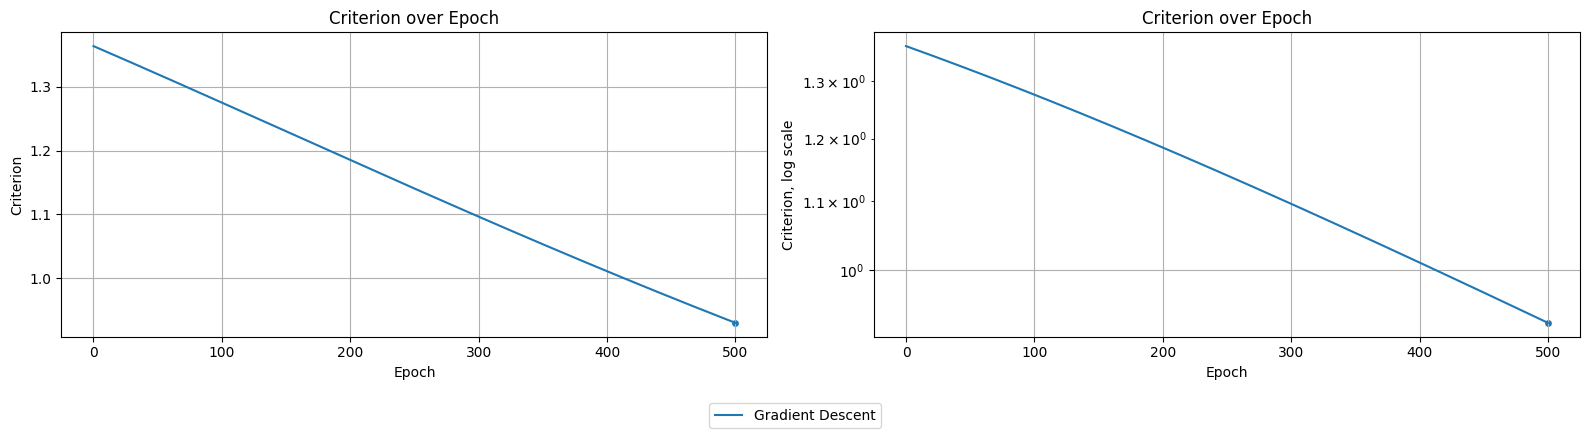

In [27]:
plots(data=result_dict)

### Задание 4 (3 балла)

В этом задании вам нужно:
- Протестировать градиентный спуск с шагом $\gamma_k = \frac{1}{L}$ на 500 эпохах
- Протестировать градиентный спуск с разными, но константными шагами $\gamma_k = \gamma$ на 1000 эпохах (не менее четырёх экспериментов). Попробуйте $\gamma$ из диапазона от $0$ до $3/L$
- Построить следующие графики (в дальнейших заданиях нужно использовать такой же набор графиков):
  - Критерий / Эпоха (логарифмическая шкала)
  - Критерий / Время (логарифмическая шкала)
  - Точность (Accuracy) / Эпоха
  - Точность (Accuracy) / Время

- Определить, какой шаг оказался "лучшим". Не забудьте пояснить, по каким критериям определяли "лучший"
- Сделайте выводы

### Решение

In [28]:
eps = 1e-8
lambdas = np.linspace(0 + eps, 3 / L, num=4)
lambdas

array([1.00000000e-08, 1.90285721e-01, 3.80571432e-01, 5.70857143e-01])

In [29]:
plots = partial(
    draw_plots,
    plots=[
        ({"name": "Epoch"}, {"name": "Criterion", "log": True}),
        ({"name": "Time"}, {"name": "Criterion", "log": True}),
        ({"name": "Epoch"}, {"name": "Accuracy"}),
        ({"name": "Time"}, {"name": "Accuracy"}),
    ],
)

In [30]:
%%time

first_result = check_approx_mush(
    approximations=[
        ("Base Gradient Descent", ManualSolver(lr=1e-3)),
        ("Gradient Descent with lambda = 1/L", ManualSolver(lr=1 / L)),
    ],
    epochs=500,
)

lambdas = np.linspace(0, 3 / L, num=4)
labdas_for_print = np.round(lambdas, 4)
second_result = check_approx_mush(
    approximations=[
        ("Base Gradient Descent", ManualSolver(lr=1e-3)),
        (
            f"Gradient Descent with lambda = {labdas_for_print[0]}",
            ManualSolver(lr=lambdas[0]),
        ),
        (
            f"Gradient Descent with lambda = {labdas_for_print[1]}",
            ManualSolver(lr=lambdas[1]),
        ),
        (
            f"Gradient Descent with lambda = {labdas_for_print[2]}",
            ManualSolver(lr=lambdas[2]),
        ),
        (
            f"Gradient Descent with lambda = {labdas_for_print[3]}",
            ManualSolver(lr=lambdas[3]),
        ),
    ],
    epochs=1_000,
)

Base Gradient Descent: 100%|█| 500/500 [00:06<00:00, 78.38it/s, Loss=1.21, Accuracy=0
Gradient Descent with lambda = 1/L: 100%|█| 500/500 [00:06<00:00, 77.51it/s, Loss=0.1
Base Gradient Descent: 100%|█| 1000/1000 [00:13<00:00, 76.16it/s, Loss=0.916, Accurac
Gradient Descent with lambda = 0.0: 100%|█| 1000/1000 [00:15<00:00, 64.81it/s, Loss=1
Gradient Descent with lambda = 0.1903: 100%|█| 1000/1000 [00:17<00:00, 55.78it/s, Los
Gradient Descent with lambda = 0.3806: 100%|█| 1000/1000 [00:12<00:00, 82.69it/s, Los
Gradient Descent with lambda = 0.5709: 100%|█| 1000/1000 [00:14<00:00, 68.51it/s, Los

CPU times: user 4min 4s, sys: 1.78 s, total: 4min 6s
Wall time: 1min 26s


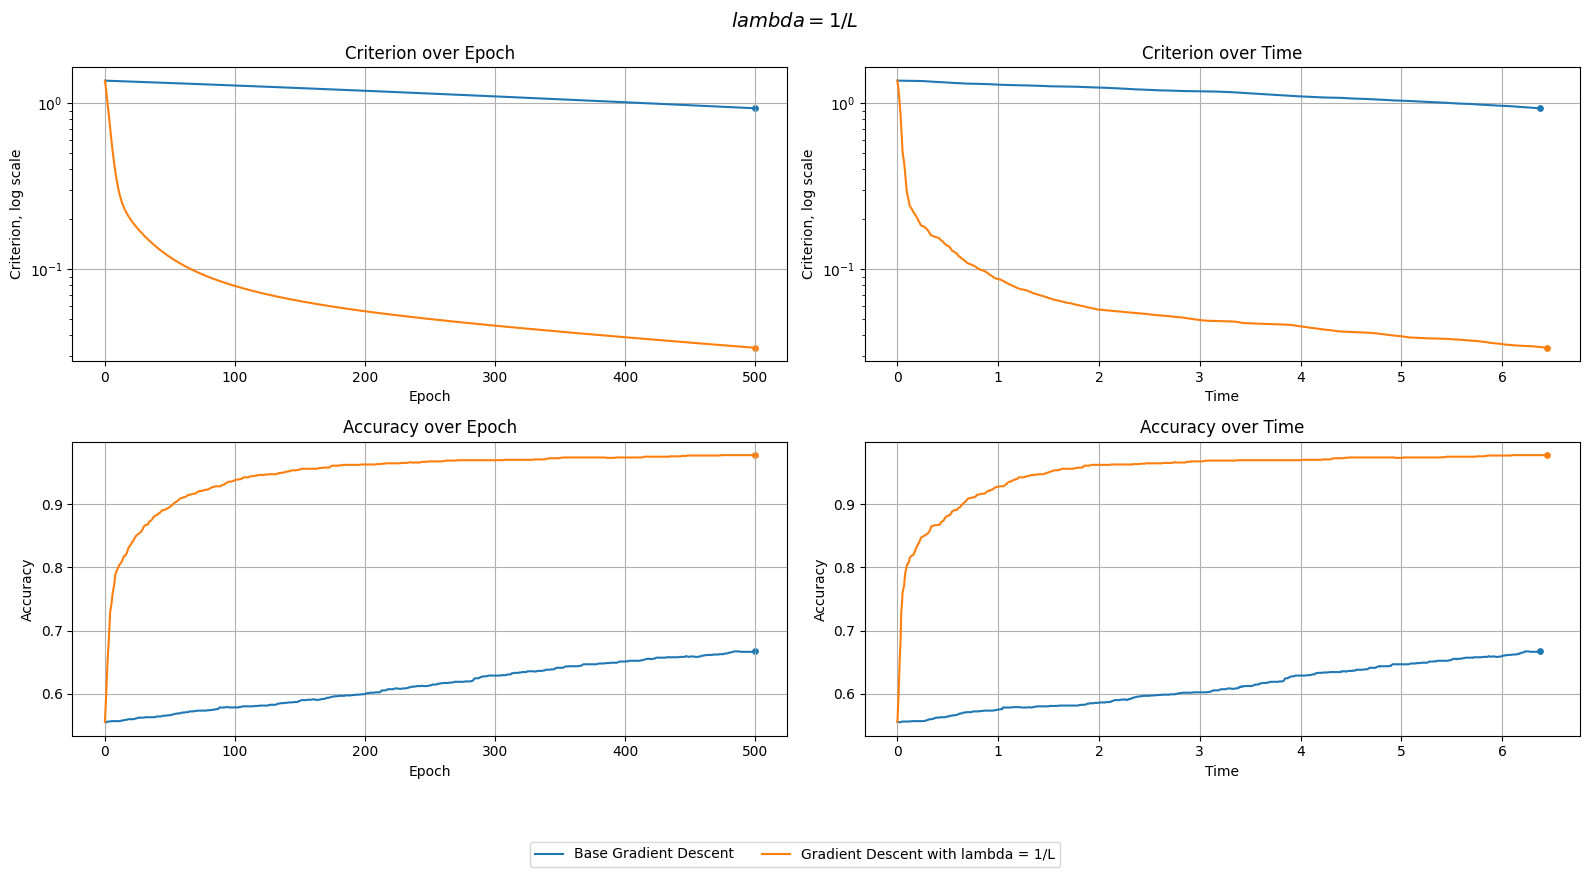

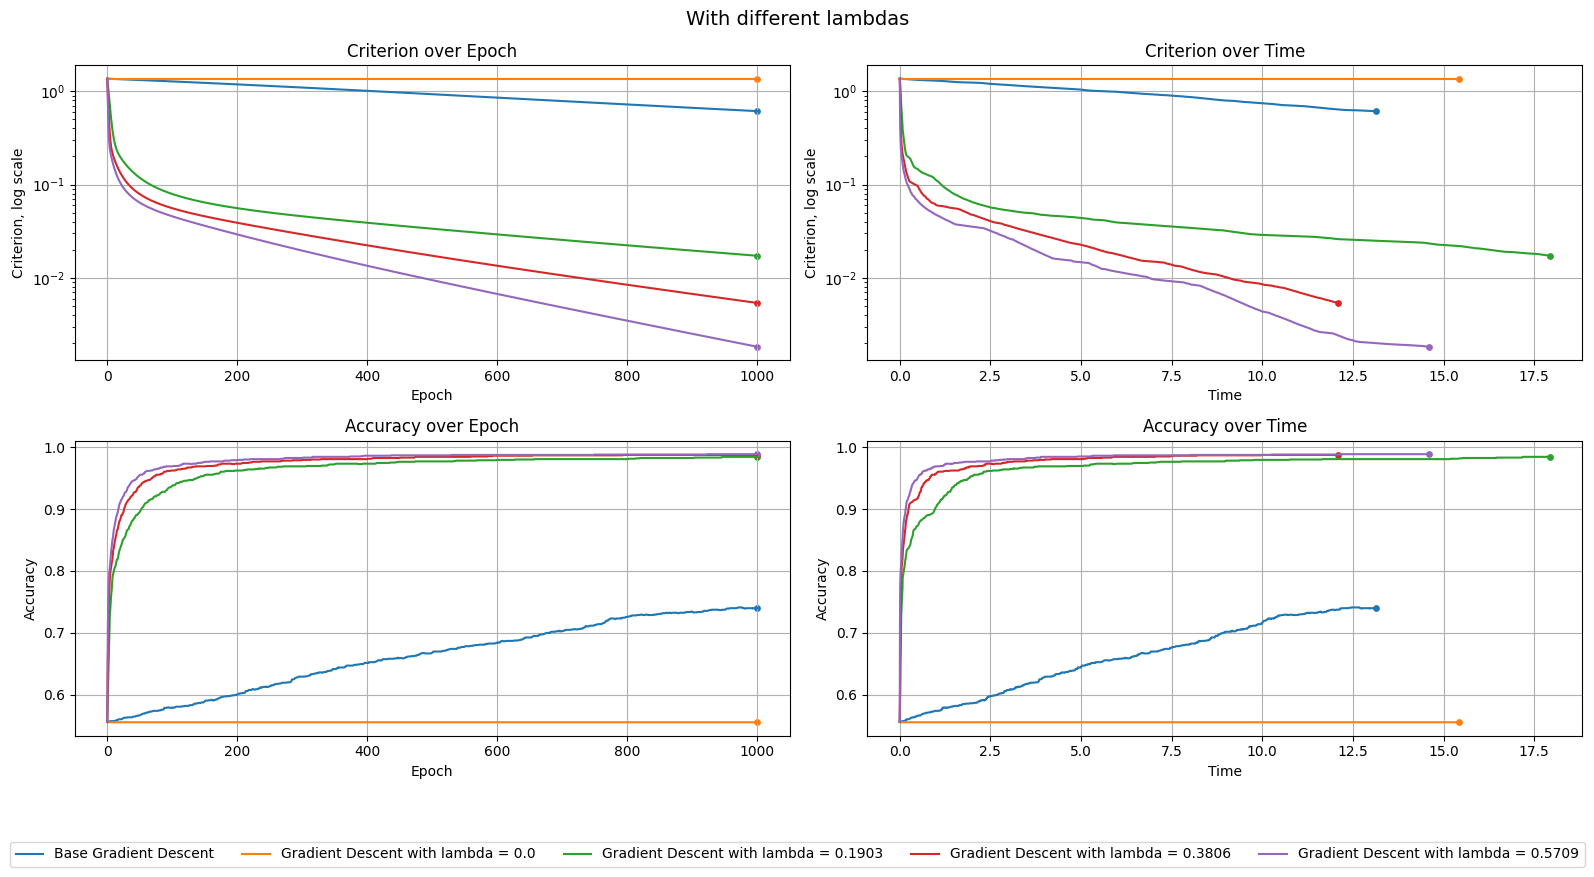

In [31]:
plots(data=first_result, title="$lambda = 1 / L$")
plots(data=second_result, title="With different lambdas")

**Выводы**

Кажется, что лучашя $\gamma$ оказалась самая близкая, то есть $L/3$.

### Задание 6 (5 баллов)

Рассмотрим так называемый Метод тяжёлого шарика (Heavy Ball)

$$
\begin{align*}
& x_{k+1} = x_k - \gamma_k \sum_{i\in \mathcal{X}} \nabla f_i(x_k) + \beta_k (x_k - x_{k-1})
\end{align*}
$$

Или, как обычно записывают на практике:

$$
\begin{align*}
& h_k = \beta_k h_{k-1} - \gamma_k \sum_{i\in \mathcal{X}} \nabla f_i(x_k) \\
& x_{k+1} = x_k + h_k
\end{align*}
$$

Метод как бы предполагает наличие у текущей точки есть инерция, как у "тяжелого" материального шарика движущегося по наклонной поверхности.


В этом задании вам нужно:
- Реализовать метод тяжёлого шарика как класс, унаследованный от `BaseSolver`. Обратите внимание, что в методе есть дополнительный гиперпараметр $\beta_k$
- Запустить метод тяжёлого шарика на датасете mushrooms на 500 эпохах и подберите лучший набор гиперпарамеров ($\gamma_k$ и $\beta_k$), как выше с градиентным спуском
- Построить графики, как в предыдущем задании
- Сделать выводы. В том числе опишите, на что влияет изменение $\beta_k$

### Решение

In [32]:
class HavyBallSolver(BaseSolver):
    def __init__(
        self,
        lr: float | Callable,
        beta: float | Callable,
        grad_f: Callable = mush_grad,
        hess_f: Callable = mush_hess,
    ) -> None:
        self.grad_f = grad_f
        self.hess_f = hess_f
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr
        self.beta = beta if isinstance(lr, Callable) else lambda _: beta
        self.h = 0

    def step(self, x, k):
        self.h = self.beta(k) * self.h - self.lr(k) * self.grad_f(x)
        return x + self.h

In [33]:
%%time

betas = np.linspace(0.2, 1, num=4, endpoint=False)
result = check_approx_mush(
    approximations=[
        ("Base Gradient Descent", ManualSolver(lr=1 / L)),
        (
            f"Havy Ball Descent with beta = {betas[0]}",
            HavyBallSolver(lr=1 / L, beta=betas[0]),
        ),
        (
            f"Havy Ball Descent with beta = {betas[1]}",
            HavyBallSolver(lr=1 / L, beta=betas[1]),
        ),
        (
            f"Havy Ball Descent with beta = {betas[2]}",
            HavyBallSolver(lr=1 / L, beta=betas[2]),
        ),
        (
            f"Havy Ball Descent with beta = {betas[3]}",
            HavyBallSolver(lr=1 / L, beta=betas[3]),
        ),
    ],
    epochs=500,
)

Base Gradient Descent: 100%|█| 500/500 [00:09<00:00, 50.59it/s, Loss=0.195, Accuracy=
Gradient Descent with beta = 0.2: 100%|█| 500/500 [00:10<00:00, 45.95it/s, Loss=0.173
Gradient Descent with beta = 0.4: 100%|█| 500/500 [00:08<00:00, 60.23it/s, Loss=0.149
Gradient Descent with beta = 0.6000000000000001: 100%|█| 500/500 [00:09<00:00, 53.90i
Gradient Descent with beta = 0.8: 100%|█| 500/500 [00:06<00:00, 77.10it/s, Loss=0.114

CPU times: user 2min 3s, sys: 740 ms, total: 2min 4s
Wall time: 44.9 s


In [34]:
betas

array([0.2, 0.4, 0.6, 0.8])

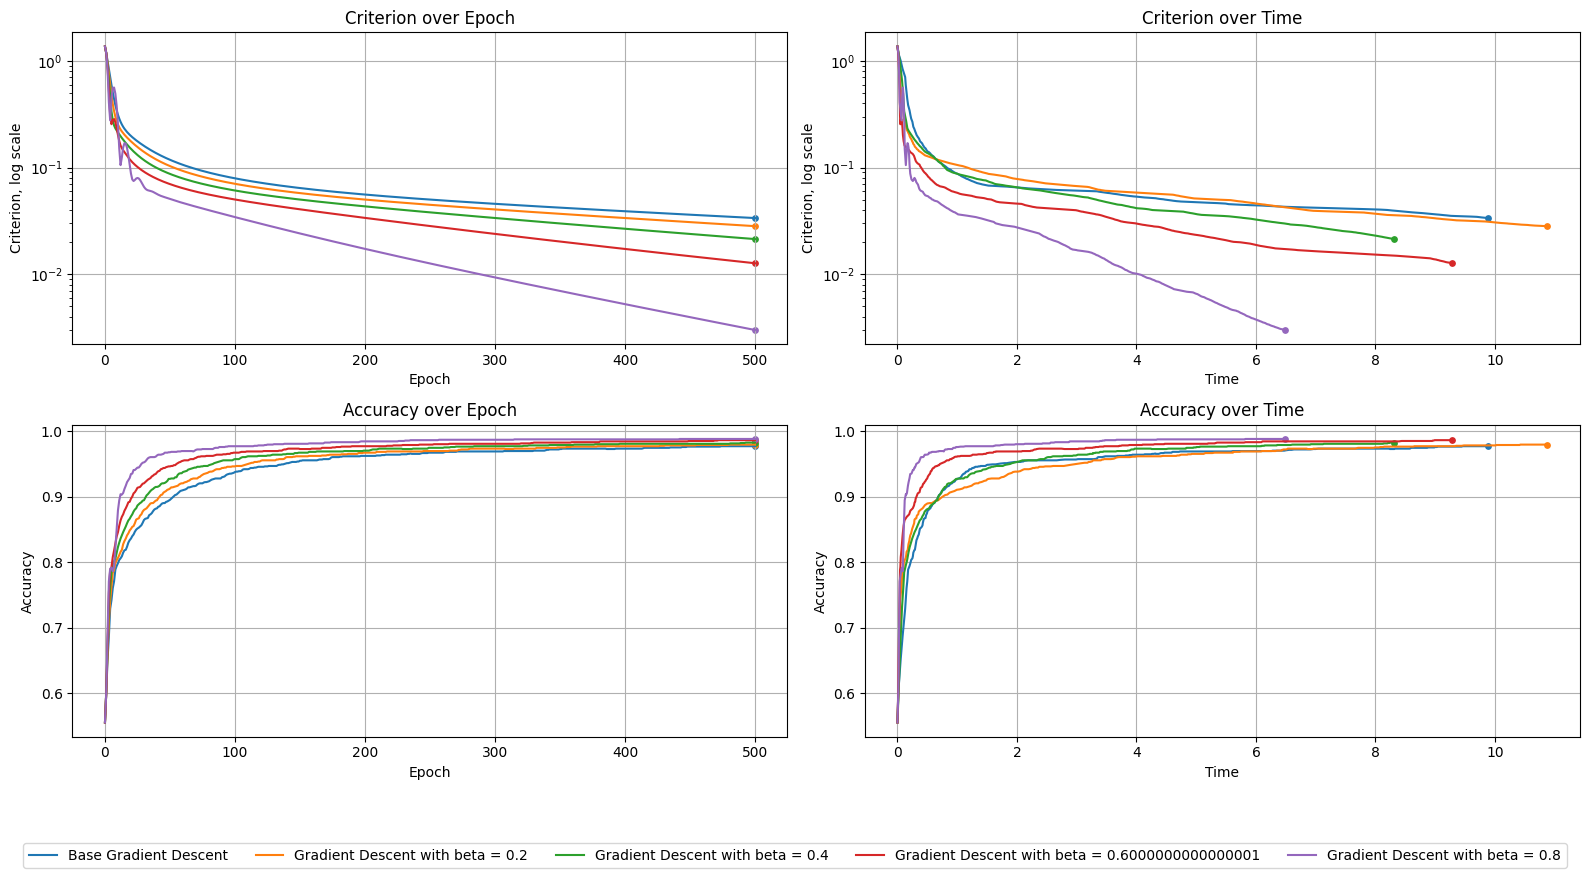

In [35]:
plots(data=result)

In [36]:
%%time

betas = np.linspace(1e-4, 0.99, num=4)

# Очевидно, что лучшая сходимость будет при 1/L и beta = 0, но мы исключим эту точку
lambdas = np.linspace(1e-4, 3 / L, num=4)

result = dict()
for beta in betas:
    for lambda_ in lambdas:
        name = f"{beta=}, {lambda_=}"
        result[name] = check_approx_mush(
            approximations=[(name, HavyBallSolver(lr=lambda_, beta=beta))]
        )

beta=np.float64(0.0001), lambda_=np.float64(0.0001): 100%|█| 500/500 [00:05<00:00, 84
beta=np.float64(0.0001), lambda_=np.float64(0.19035238095238094): 100%|█| 500/500 [00
beta=np.float64(0.0001), lambda_=np.float64(0.3806047619047619): 100%|█| 500/500 [00:
beta=np.float64(0.0001), lambda_=np.float64(0.5708571428571428): 100%|█| 500/500 [00:
beta=np.float64(0.3300666666666667), lambda_=np.float64(0.0001): 100%|█| 500/500 [00:
beta=np.float64(0.3300666666666667), lambda_=np.float64(0.19035238095238094): 100%|█|
beta=np.float64(0.3300666666666667), lambda_=np.float64(0.3806047619047619): 100%|█| 
beta=np.float64(0.3300666666666667), lambda_=np.float64(0.5708571428571428): 100%|█| 
beta=np.float64(0.6600333333333334), lambda_=np.float64(0.0001): 100%|█| 500/500 [00:
beta=np.float64(0.6600333333333334), lambda_=np.float64(0.19035238095238094): 100%|█|
beta=np.float64(0.6600333333333334), lambda_=np.float64(0.3806047619047619): 100%|█| 
beta=np.float64(0.6600333333333334), lambda_=np.float6

CPU times: user 6min 7s, sys: 2.09 s, total: 6min 10s
Wall time: 2min 9s


In [37]:
max(result, key=lambda x: result[x][x]["Accuracy"][-1])

'beta=np.float64(0.99), lambda_=np.float64(0.19035238095238094)'

**Выводы**

Лучше всего будет воспользоваться самым большим $\beta$, влиеят он на "инерцию", чем больше $\beta$, тем больше "инерция нашего шарика" ну и в нашей задаче быстрее сходится к решению. Хотя если взять оптимальную $\gamma$ то "инерция" нам будет не нужна.

### Задание 7* (5 баллов)

Рассмотрим ещё один ускоренный метод - Ускоренный градиентный метод Нестерова (Nesterov Momentum)

$$
\begin{align*}
& x_{k+1} = y_k - \gamma_k \sum_{i\in \mathcal{X}} \nabla f_i(y_k) \\
& y_{k+1} = x_{k+1} + \beta_k (x_{k+1} - x_k)
\end{align*}
$$

Или, как обычно записывают на практике:

$$
\begin{align*}
& h_k = \beta_k h_{k-1} - \gamma_k \sum_{i\in \mathcal{X}} \nabla f_i(x_k + \beta_k  h_{k-1})\\
& x_{k+1} = x_k + h_k
\end{align*}
$$

Ключевое отличие метода Нестерова от метода тяжёлого шарика в том, что благодаря импульсу в точку подсчёта градиента, происходит экстраполяция, или "взгляд в будущее"


В этом задании вам нужно:
- Реализовать метод Нестерова как класс, унаследованный от `BaseSolver`
- Запустить метод Нестерова на датасете mushrooms на 500 эпохах и подберите лучший набор гиперпарамеров ($\gamma_k$ и $\beta_k$), как в предыдущих заданиях
- Построить графики, как в предыдущих заданиях
- Сделать выводы. В том числе опишите, на что влияет изменение $\beta_k$

### Решение

In [114]:
class NesterovSolver(ManualSolver):
    def __init__(
        self,
        lr: float | Callable,
        beta: float | Callable,
        grad_f: Callable = mush_grad,
        hess_f: Callable = mush_hess,
    ) -> None:
        self.grad_f = grad_f
        self.hess_f = hess_f
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr
        self.beta = beta if isinstance(lr, Callable) else lambda _: beta
        self.h = 0

    def step(self, x: np.ndarray, k: int) -> np.ndarray:
        self.h = self.beta(k) * self.h - self.lr(k) * self.grad_f(
            x + self.beta(k) * self.h
        )
        return x + self.h

In [115]:
%%time

betas = np.linspace(0.2, 1, num=4, endpoint=False)
result = check_approx_mush(
    approximations=[
        (
            f"Nesterov Descent with beta = {betas[0]}",
            NesterovSolver(lr=1 / L, beta=betas[0]),
        ),
        (
            f"Nesterov Descent with beta = {betas[1]}",
            NesterovSolver(lr=1 / L, beta=betas[1]),
        ),
        (
            f"Nesterov Descent with beta = {betas[2]}",
            NesterovSolver(lr=1 / L, beta=betas[2]),
        ),
        (
            f"Nesterov Descent with beta = {betas[3]}",
            NesterovSolver(lr=1 / L, beta=betas[3]),
        ),
    ],
    epochs=100,
)

Nesterov Descent with beta = 0.2: 100%|█| 100/100 [00:01<00:00, 82.78it/s, Loss=0.359
Nesterov Descent with beta = 0.4: 100%|█| 100/100 [00:01<00:00, 86.58it/s, Loss=0.325
Nesterov Descent with beta = 0.6000000000000001: 100%|█| 100/100 [00:01<00:00, 64.42i
Nesterov Descent with beta = 0.8: 100%|█| 100/100 [00:01<00:00, 76.73it/s, Loss=0.199

CPU times: user 15.3 s, sys: 106 ms, total: 15.4 s
Wall time: 5.27 s


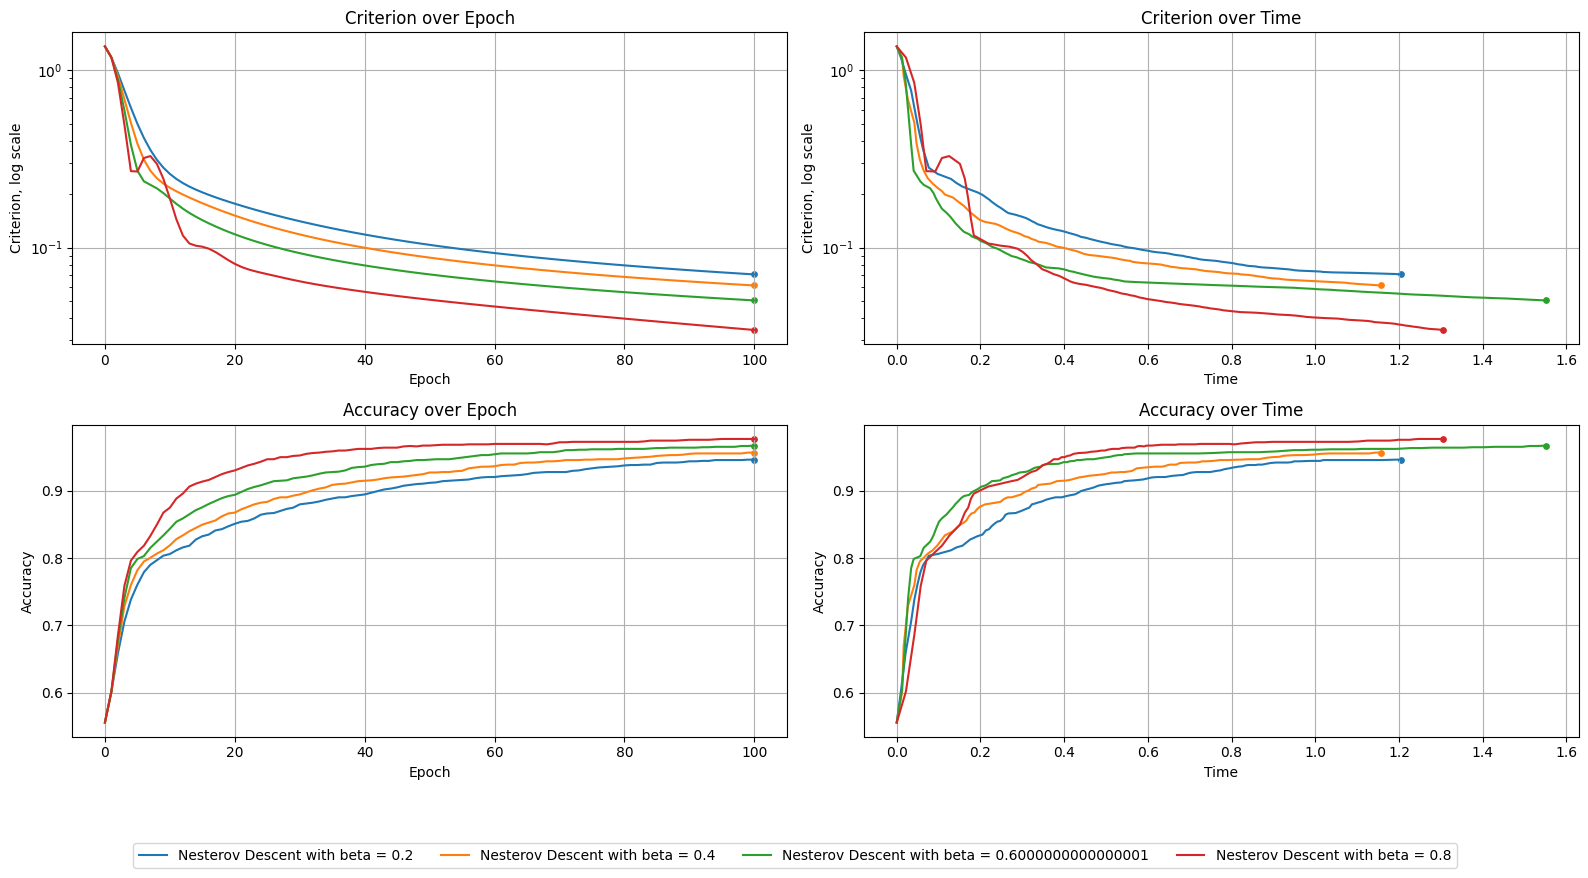

In [116]:
plots(data=result)

In [117]:
%%time

betas = np.linspace(1e-4, 0.99, num=4)

lambdas = np.linspace(1e-4, 3 / L, num=4)

result = dict()
for beta in betas:
    for lambda_ in lambdas:
        name = f"{beta=}, {lambda_=}"
        result[name] = check_approx_mush(
            approximations=[(name, NesterovSolver(lr=lambda_, beta=beta))]
        )

beta=np.float64(0.0001), lambda_=np.float64(0.0001): 100%|█| 500/500 [00:08<00:00, 61
beta=np.float64(0.0001), lambda_=np.float64(0.19035238095238094): 100%|█| 500/500 [00
beta=np.float64(0.0001), lambda_=np.float64(0.3806047619047619): 100%|█| 500/500 [00:
beta=np.float64(0.0001), lambda_=np.float64(0.5708571428571428): 100%|█| 500/500 [00:
beta=np.float64(0.3300666666666667), lambda_=np.float64(0.0001): 100%|█| 500/500 [00:
beta=np.float64(0.3300666666666667), lambda_=np.float64(0.19035238095238094): 100%|█|
beta=np.float64(0.3300666666666667), lambda_=np.float64(0.3806047619047619): 100%|█| 
beta=np.float64(0.3300666666666667), lambda_=np.float64(0.5708571428571428): 100%|█| 
beta=np.float64(0.6600333333333334), lambda_=np.float64(0.0001): 100%|█| 500/500 [00:
beta=np.float64(0.6600333333333334), lambda_=np.float64(0.19035238095238094): 100%|█|
beta=np.float64(0.6600333333333334), lambda_=np.float64(0.3806047619047619): 100%|█| 
beta=np.float64(0.6600333333333334), lambda_=np.float6

CPU times: user 6min 3s, sys: 2 s, total: 6min 5s
Wall time: 2min 8s


In [118]:
max(result, key=lambda x: result[x][x]["Accuracy"][-1])

'beta=np.float64(0.99), lambda_=np.float64(0.19035238095238094)'

**Выводы**
- ...

### Задание 8 (5 баллов)

Три предыдущих метода (градиентный спуск, метод тяжёлого шарика и метод Нестерова) относятся к методам первого порядка, так как использует для обновления только градиент целевой функции

Рассмотрим один из самых известных методов второго порядка - Метод Ньютона (Newton's method):

$$
x_{k+1} = x_k - \nabla^2f(x_k)^{-1} \nabla f(x_k)
$$

А точнее, его модификацию - демпфированный метод Ньютона (Dumped Newton's method):

$$
x_{k+1} = x_k - \gamma_k \nabla^2f(x_k)^{-1} \nabla f(x_k)
$$

Как видно из описания метода, для обновления параметров используется обратный гессиан

В этом задании вам нужно:
- Реализовать демпфированный метод Ньютона как класс, унаследованный от `BaseSolver`
- Запустить демпфированный метод Ньютонана датасете mushrooms на 500 эпохах и подберите лучший шаг ($\gamma_k$), как в предыдущих заданиях. Обязательно попробуйте $\gamma_k = 1$, что соответствует оригинальному методу Ньютона
- Построить графики, как в предыдущих заданиях
- Зафиксировать $\gamma_k = 1$ и попробовать варьировать начальную точку алгоритма `start_w`. Обязательно попробуйте нулевой и единичный вектора. Построить графики сходимости
- Сделать выводы

### Решение

In [89]:
class NewtonSolver(BaseSolver):
    def __init__(
        self,
        lr: float | Callable,
        grad_f: Callable = mush_grad,
        hess_f: Callable = mush_hess,
    ) -> None:
        self.grad_f = grad_f
        self.hess_f = hess_f
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr

    def step(self, x, k):
        return x - self.lr(k) * np.linalg.inv(self.hess_f(x)) @ self.grad_f(x)

In [90]:
%%time

lambdas = np.linspace(1e-3, 1, num=4)
result = check_approx_mush(
    approximations=[
        (f"Newton with lr = {lambdas[0]}", NewtonSolver(lr=lambdas[0])),
        (f"Newton with lr = {lambdas[1]}", NewtonSolver(lr=lambdas[1])),
        (f"Newton with lr = {lambdas[2]}", NewtonSolver(lr=lambdas[2])),
        (f"Newton with lr = {lambdas[3]}", NewtonSolver(lr=lambdas[3])),
    ],
    epochs=75,
)

Newton with lr = 0.001: 100%|█| 75/75 [00:37<00:00,  2.03it/s, Loss=1.76, Accuracy=0.
Newton with lr = 0.334: 100%|█| 75/75 [00:34<00:00,  2.19it/s, Loss=0.285, Accuracy=0
Newton with lr = 0.667: 100%|█| 75/75 [00:38<00:00,  1.96it/s, Loss=0.204, Accuracy=0
Newton with lr = 1.0: 100%|█| 75/75 [00:45<00:00,  1.64it/s, Loss=0.163, Accuracy=0.9

CPU times: user 8min 6s, sys: 31.3 s, total: 8min 38s
Wall time: 2min 35s


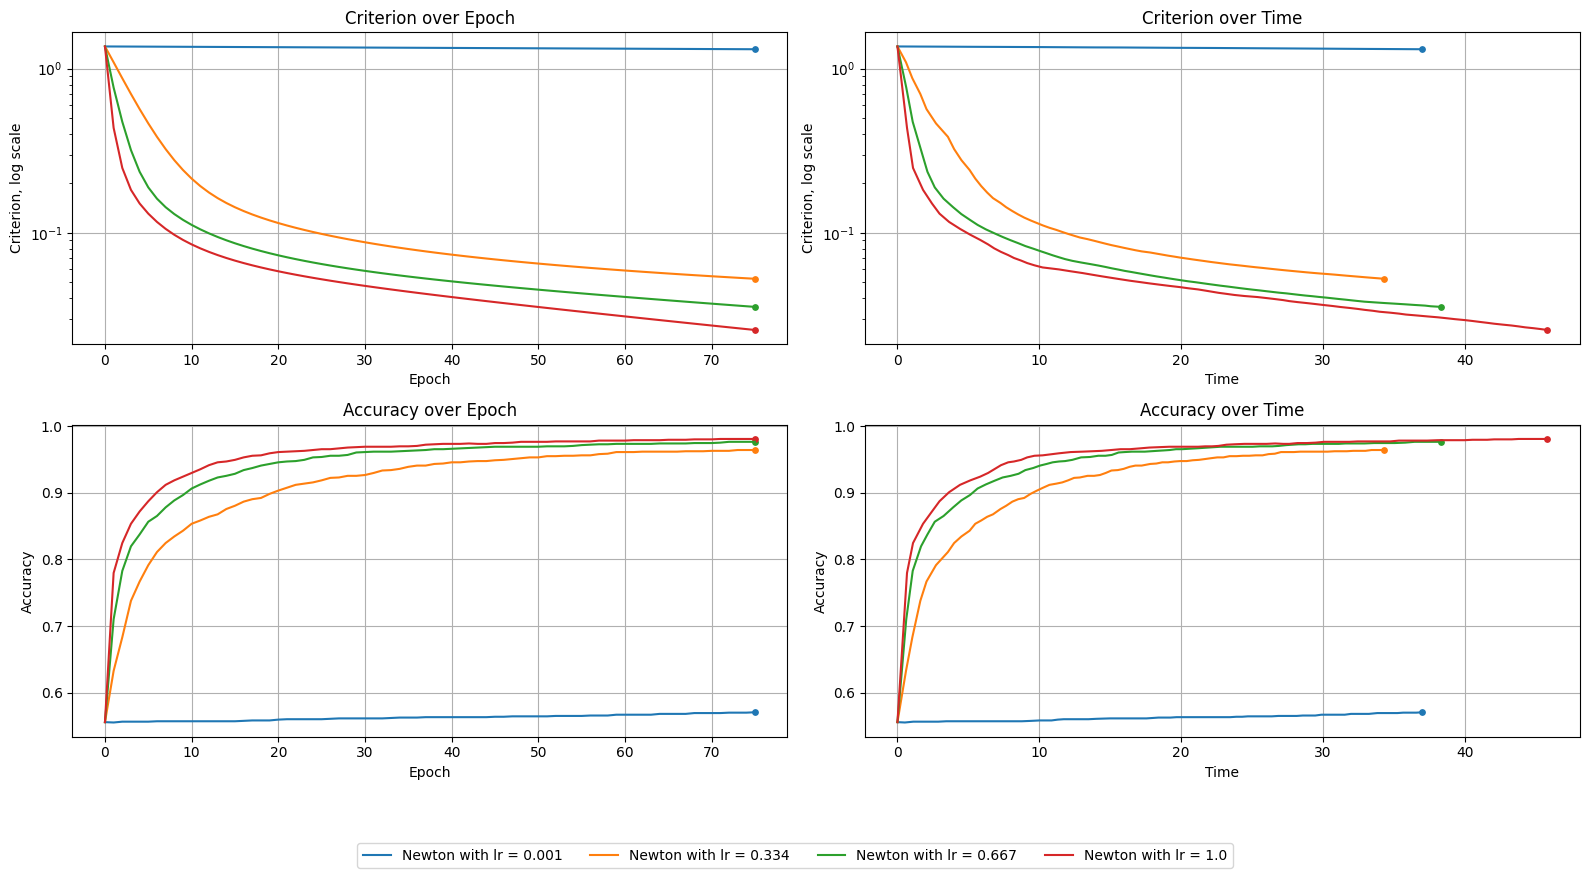

In [91]:
plots(data=result)

In [92]:
zerous = np.zeros(test_mush_x.shape[1])
ones = np.ones(test_mush_x.shape[1])

In [93]:
%%time

result_zerous = check_approx_mush(
    approximations=[
        (f"Newton with zerous", NewtonSolver(lr=1)),
    ],
    epochs=100,
    start_w=zerous,
)

result_ones = check_approx_mush(
    approximations=[(f"Newton with ones", NewtonSolver(lr=1))], epochs=100, start_w=ones
)

Newton with zerous: 100%|█| 100/100 [00:47<00:00,  2.10it/s, Loss=0.114, Accuracy=0.9
Newton with ones: 100%|█| 100/100 [00:46<00:00,  2.14it/s, Loss=0.139, Accuracy=0.984

CPU times: user 5min 8s, sys: 21.8 s, total: 5min 30s
Wall time: 1min 34s


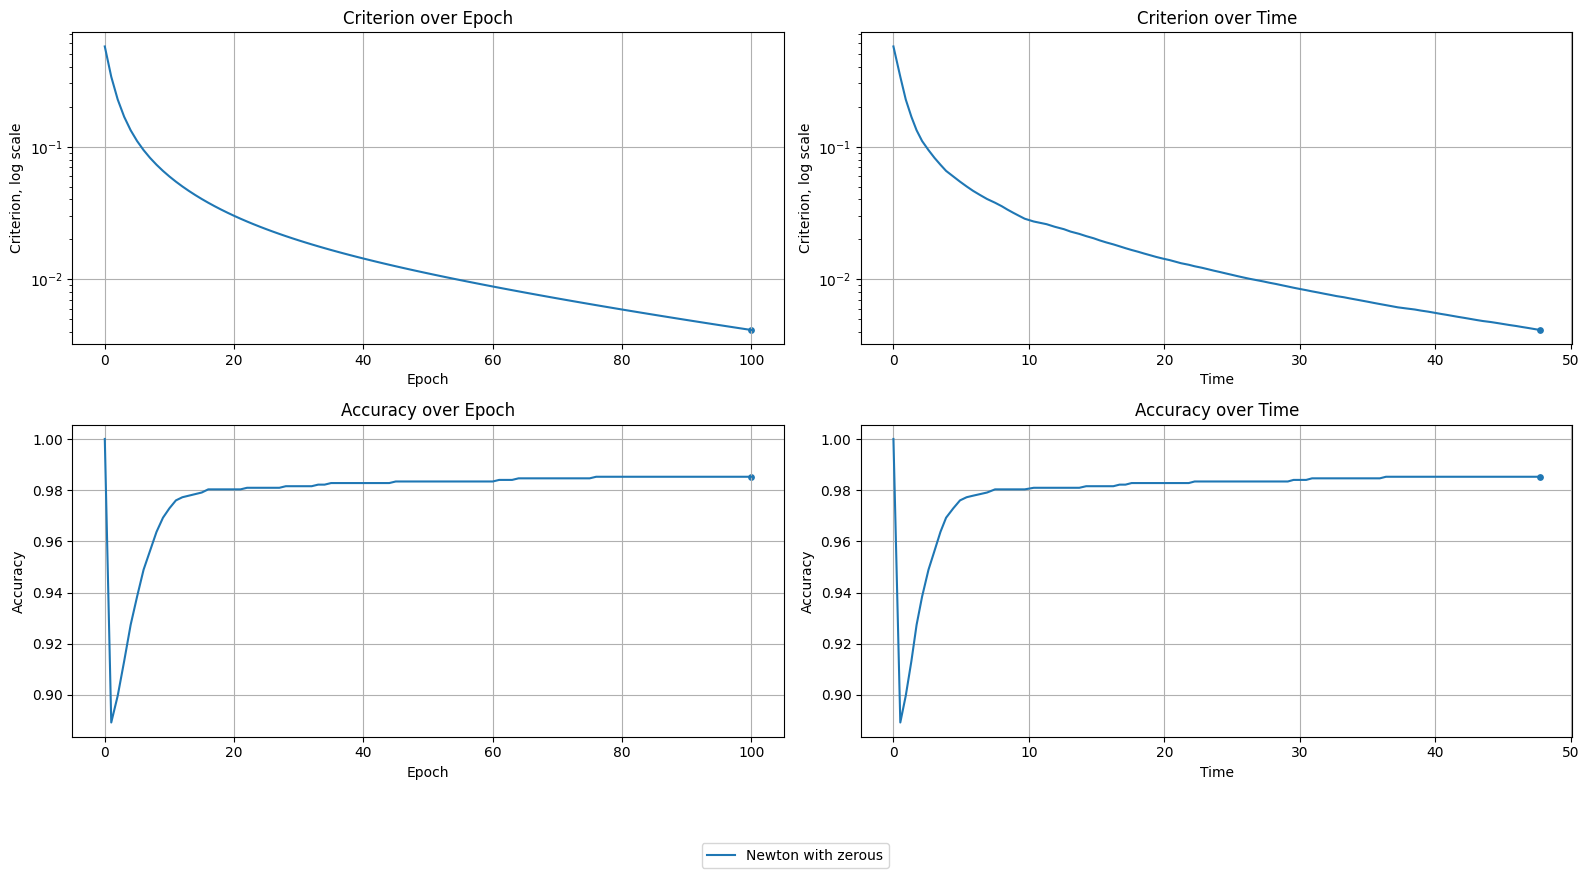

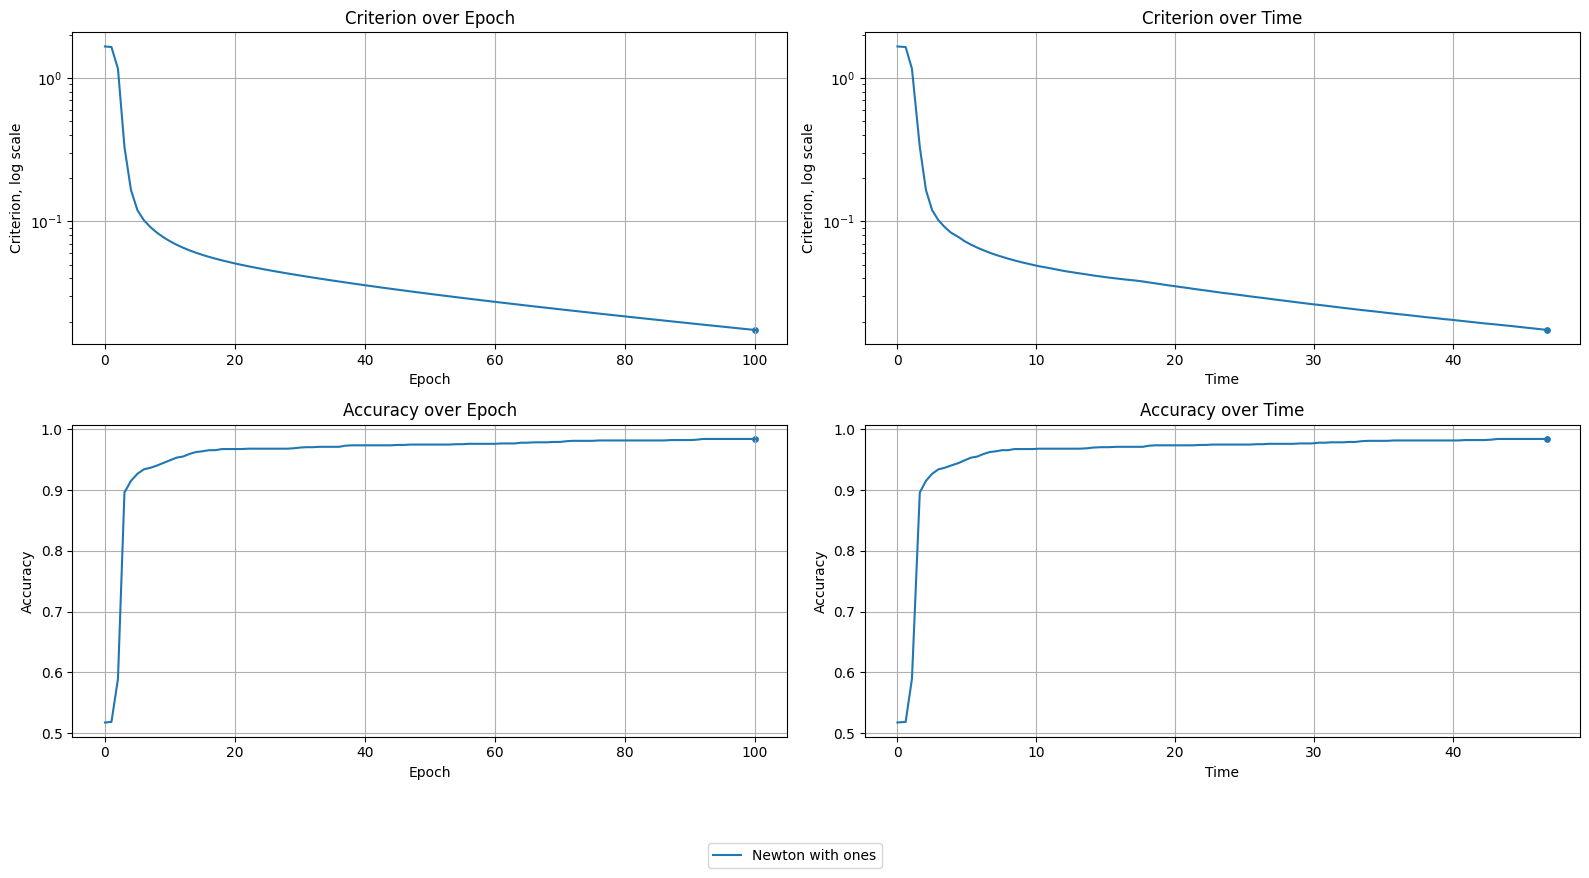

In [94]:
plots(result_zerous)
plots(result_ones)

### Задание 9 (2 балла)

В этом задании вам нужно:
- Построить общий график для лучших методов из предыдущих заданий (градиентный спуск, метод тяжёлого шарика, метод Нестерова*, метод Ньютона)
- Объяснить, по каким критериям выбирали лучшие методы
- Сделать выводы. Какой метод наиболее предпочтителен? Почему?

### Решение

In [95]:
%%time

result = check_approx_mush(
    approximations=[
        (f"GD with lr = {lambdas[0]}", ManualSolver(lr=1 / L)),
        (
            f"Havy Ball GD with lr = {np.round(3/L, 3)}, beta=0.99",
            HavyBallSolver(lr=3 / L, beta=0.99),
        ),
        (f"Newton GD with lr = 1", NewtonSolver(lr=1)),
    ],
    epochs=250,
)

GD with lr = 0.001: 100%|█| 250/250 [00:03<00:00, 73.57it/s, Loss=0.276, Accuracy=0.9
Havy Ball GD with lr = 0.571, beta=0.99: 100%|█| 250/250 [00:02<00:00, 95.75it/s, Los
Newton GD with lr = 1: 100%|█| 250/250 [02:05<00:00,  1.99it/s, Loss=0.114, Accuracy=


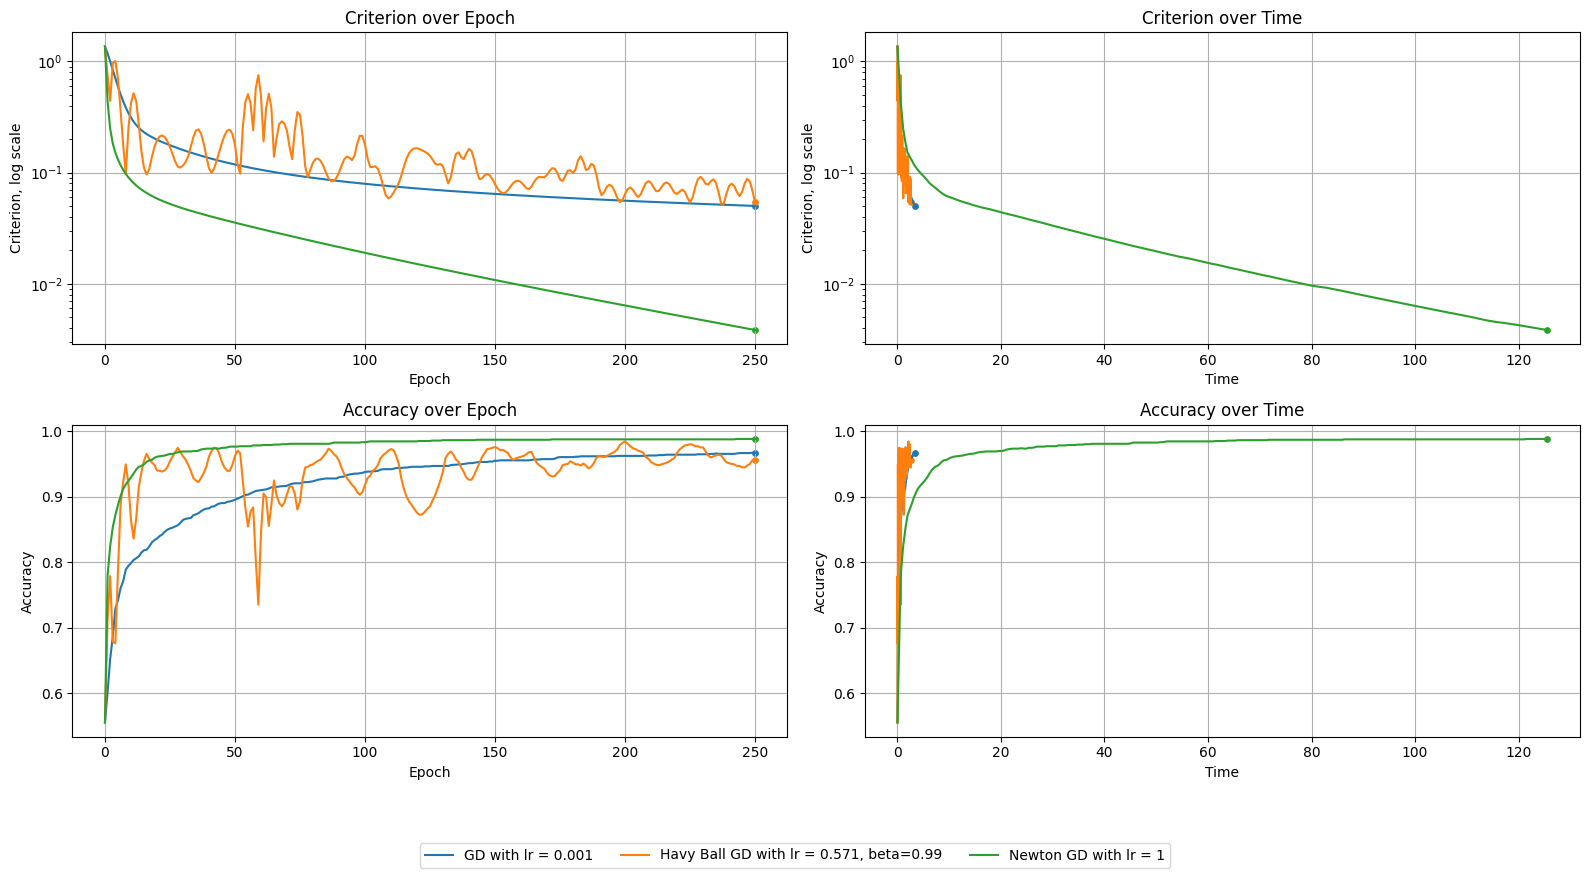

In [96]:
plots(result)

**Выводы**

Очевидно, что лучший метод - метод классический метод Ньютона с $\gamma = 1$, но мы не имеем столько времени чтобы считать обратный Гессиан для каждой итерации. Для классического GD мы должны знать константу $L$, которую не всегда можем посчитать. Поэтому лучше всего использовать (из реализованных) метод тяжелого шарика.  

## Часть 2. Сравнение Numpy, PyTorch и JAX (12 + 11 балла)

В предыдущих частях вы в основном работали с Numpy, так как первая и вторая производные нашей функции могли быть теоретически вычислены. Однако, так бывает не всегда. В таких случаях прибегают к библиотекам, которые предоставляют функции автоматического дифференцирования. Одни из самых популярных (и знакомых вам из семинаров) - PyTorch и JAX. Это часть работы посвящена сравнению удобства и производительности трёх библиотек - Numpy, PyTorch и JAX - для реализации как простых математических операций, так и автоматического дифференцирования

### Задание 1 (1 балл)

В этом задании вам нужно:

- Реализовать функцию `measure_script_time()`, которая
  - Принимает другую функцию, аргументы для неё, количество повторений вызова и количество "разгоночных вызовов" (warm up calls)
  - Совершает "разгоночные вызовы" переданной функции, а затем замеряет среднее время работы переданной функции на переданном количестве повторений
  - Возвращает среднее время работы переданной функции в миллисекундах
- Зафиксировать для всех дальнейших экспериментов количество повторений равное 50 и количество "разгоночных вызовов" равное 5
- Предположить, для чего нужны "разгоночные вызовы"

### Решение

In [47]:
def measure_script_time(function, function_args, warmup_calls=5, n_iter=50):
    for _ in range(warmup_calls):
        function(**function_args)

    start_time = time.time()
    for _ in range(n_iter):
        function(**function_args)
    end_time = time.time()

    return (end_time - start_time) / n_iter

Разгоночный вызов необходим для того, чтобы получить результаты близкие к рабочим.

### Задание 2 (4 баллов)

В этом задании вам нужно:

- Реализовать функцию, которая будет измерять среднее время выполнения для каждой из библиотек (Numpy, PyTorch и JAX) следующих операций:
  - Матричного умножения (сделайте замеры для матриц размером 100, 500, 1000 и 2000)
  - Матричного сложения (сделайте замеры для матриц размером 100, 500, 1000 и 3000)
  - Поэлементного умножения двух матриц (сделайте замеры для матриц размером 100, 500, 1000 и 3000)
- Постройте соответствующие графики (отдельный график для каждой операции)
- Сделайте выводы

**ПРИМЕЧАНИЕ**: Для экспериментов дайте возможность генерировать две случайные матрицы на базе переданного seed. Зафиксируйте одно значение seed и используйте его для всех экспериментов. Очевидно, матрицы для всех трёх библиотек должны быть одинаковые. Как вариант, генерировать случайные матрицы с помощью `np.random.rand`, а затем, с помощью `torch.from_numpy` и `jnp.array`, переводить их в структуры других библиотек. Наконец, сделайте так, чтобы все матрицы во всех библиотеках были типа **float32**: `np.float32`, `torch.float32` и `jnp.float32`

### Решение

In [48]:
def get_square_matrices(shapes, generator, a=0, b=1):
    matrices = []
    for shape in shapes:
        matrices.append(
            random_generator.uniform(low=a, high=b, size=(shape, shape)).astype(
                np.float32
            )
        )
    return matrices


def get_operation_data(operations, matrices, n_iter=None):
    total_data = {}
    libraries = matrices.keys()

    local_measure_script_time = measure_script_time
    if n_iter is not None:
        local_measure_script_time = partial(measure_script_time, n_iter=n_iter)

    for operation_name, operation in operations.items():

        total_data[operation_name] = {}
        for library, matrix_list in tqdm(matrices.items(), desc=operation_name):
            total_data[operation_name][library] = []
            for matrix in matrix_list:
                time_taken = measure_script_time(operation, {"a": matrix})
                total_data[operation_name][library].append(time_taken)

    return total_data


def plot_total_times(total_data, matrix_shapes):
    operation_names = list(total_data.keys())
    libraries = list(total_data[operation_names[0]].keys())

    bar_width = 0.2
    index = np.arange(len(libraries))

    for i, operation_name in enumerate(operation_names):
        fig, ax = plt.subplots()
        for j, library in enumerate(libraries):
            times = total_data[operation_name][library]
            library_index = np.arange(len(times))
            ax.bar(library_index + j * bar_width, times, bar_width, label=library)

        ax.set_xlabel("Matrix shapes")
        ax.set_ylabel("Time (log scale)")
        ax.set_title(f"Time taken for {operation_name} operation")
        ax.set_xticks(library_index + 0.5 * bar_width)
        ax.set_xticklabels(
            [f"Shape {matrix_shapes[i]}" for i in range(len(matrix_shapes))]
        )
        ax.set_yscale("log")
        ax.legend()

        plt.show()

In [49]:
random_state = 42
random_generator = np.random.RandomState(random_state)

shapes = [100, 500, 1_000, 3_000]
matrices_numpy = get_square_matrices(shapes, random_generator)

matrices = {
    "Numpy": matrices_numpy,
    "PyTorch": [torch.from_numpy(matrix) for matrix in matrices_numpy],
    "Jax": [jnp.array(matrix) for matrix in matrices_numpy],
}

operations = {
    "Multiplicate": lambda a: a @ a,
    "Add": lambda a: a + a,
    "Multiplicate element by element": lambda a: a * a,
}

In [50]:
task_2_result_data = get_operation_data(operations, matrices)

Multiplicate element by element: 100%|█████████████████| 3/3 [00:03<00:00,  1.11s/it]


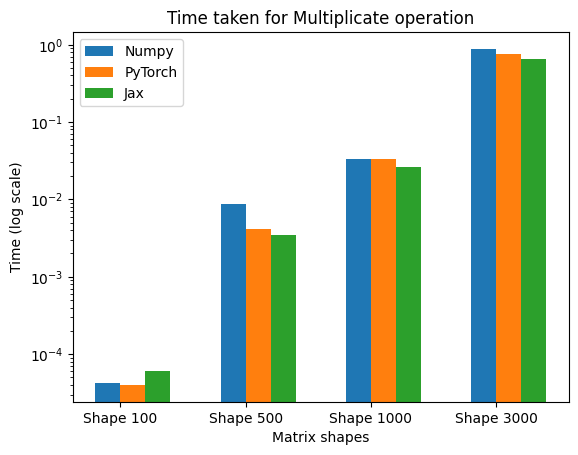

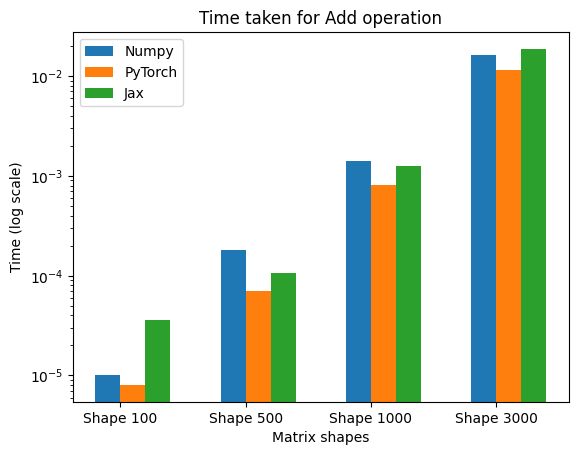

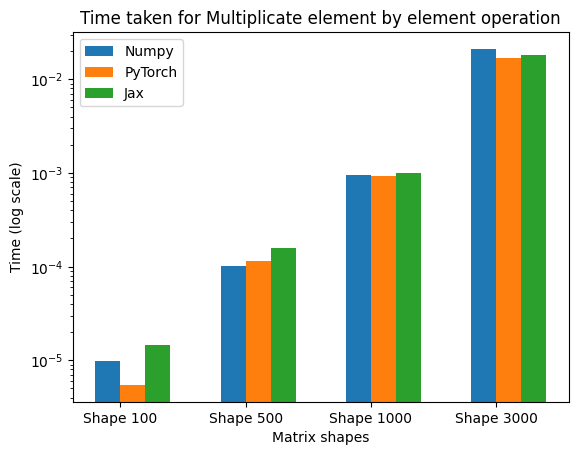

In [51]:
plot_total_times(task_2_result_data, shapes)

Выводы:

Очевидно, что `Jax` должен быть быстрее, но у меня очень слабый компьютер. Но для матриц размера $3000 \times 3000$ видна разница.

### Задание 3 (3 балла)

В этом задании вам нужно:

- Реализовать функцию, аналогичную функции из предыдущего задания (с сохранением всех примечаний!), но уже для следующих операций:
  - Вычисление собственных значений матрицы (сделайте замеры для матрицы размером 10, 50, 100 и 150)
  - Вычисление обратной матрицы (сделайте замеры для матрицы размером 10, 50, 100 и 150)
  - SVD разложение матрицы (сделайте замеры для матрицы размером 10, 50, 100 и 150)
- Постройте соответствующие графики (отдельный график для каждой операции)
- Сделайте выводы

### Решение

In [52]:
def get_operation_data(operations, matrices, n_iter=None):
    total_data = {}
    libraries = matrices.keys()

    local_measure_script_time = measure_script_time
    if n_iter is not None:
        local_measure_script_time = partial(measure_script_time, n_iter=n_iter)

    for operation_name, operation_dict in operations.items():
        total_data[operation_name] = {}
        for library, operation_func in tqdm(
            operation_dict.items(), desc=f"{operation_name}"
        ):
            total_data[operation_name][library] = []
            for matrix in matrices[library]:
                time_taken = local_measure_script_time(operation_func, {"a": matrix})
                total_data[operation_name][library].append(time_taken)

    return total_data


def plot_total_times(total_data, matrix_shapes):
    operation_names = list(total_data.keys())
    libraries = list(total_data[operation_names[0]].keys())

    bar_width = 0.2
    index = np.arange(len(libraries))

    for i, operation_name in enumerate(operation_names):
        fig, ax = plt.subplots()
        for j, library in enumerate(libraries):
            times = total_data[operation_name][library]
            library_index = np.arange(len(times))
            ax.bar(library_index + j * bar_width, times, bar_width, label=library)

        ax.set_xlabel("Matrix shapes")
        ax.set_ylabel("Time (log scale)")
        ax.set_title(f"Time taken for {operation_name} operation")
        ax.set_xticks(library_index + 0.5 * bar_width)
        ax.set_xticklabels(
            [f"Shape {matrix_shapes[i]}" for i in range(len(matrix_shapes))]
        )
        ax.set_yscale("log")
        ax.legend()

        plt.show()

In [53]:
random_state = 42
random_generator = np.random.RandomState(random_state)

shapes = [10, 50, 100, 150]
matrices_numpy = get_square_matrices(shapes, random_generator)
matrices = {
    "Numpy": matrices_numpy,
    "PyTorch": [torch.from_numpy(matrix) for matrix in matrices_numpy],
    "Jax": [jnp.array(matrix) for matrix in matrices_numpy],
}

operations = {
    "Eigenvalues": {
        "Numpy": np.linalg.eig,
        "PyTorch": torch.linalg.eigvalsh,
        "Jax": jnp.linalg.eigvals,
    },
    "Invariante": {
        "Numpy": np.linalg.inv,
        "PyTorch": lambda a: torch.linalg.inv(A=a),
        "Jax": jnp.linalg.inv,
    },
    "SVD": {  # Я прекрасно помню лекции и что будет если full_matrices=True
        "Numpy": lambda a: np.linalg.svd(a, full_matrices=False),
        "PyTorch": lambda a: torch.linalg.svd(a, full_matrices=False),
        "Jax": lambda a: jnp.linalg.svd(a, full_matrices=False),
    },
}

In [54]:
task_3_result_data = get_operation_data(operations, matrices)

SVD: 100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.40s/it]


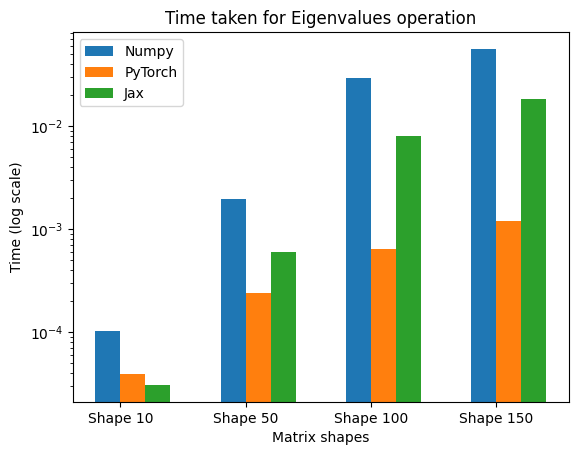

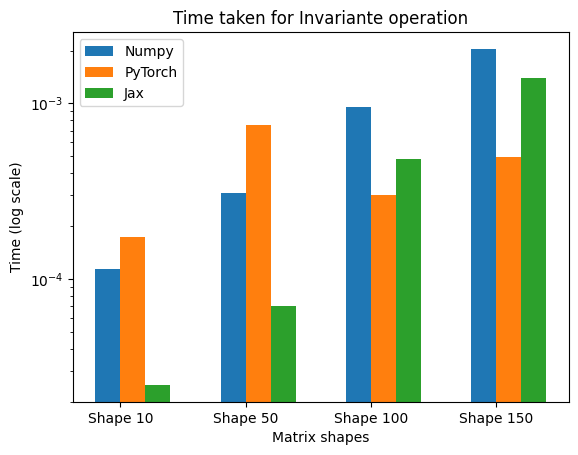

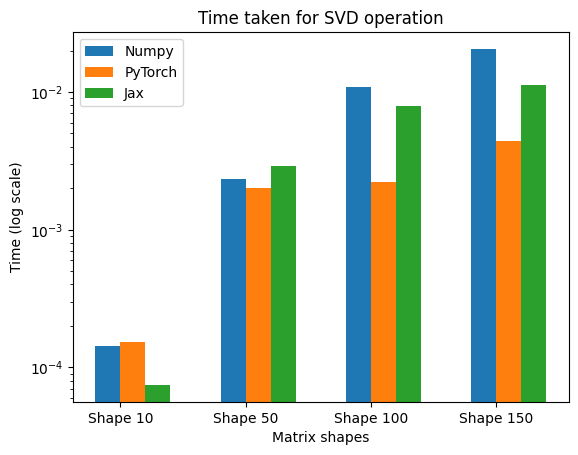

In [55]:
plot_total_times(task_3_result_data, shapes)

### Задание 4 (4 балла)

От сравнения реализации математических функций перейдём к сравнению автоматического дифференцирования. Так как Numpy не предоставляет возможности автоматического дифференцирования, для этой библиотеки вам нужно будет аналитически получить производную и реализовать её как функцию (как градиент для логистической регрессии из предыдущей части, например). Обязательно опишите процесс вывода производной


В этом задании вам нужно:

- Реализовать функцию, аналогичную функции из предыдущего задания (с сохранением всех примечаний!), но уже для операции автоматического дифференцирования (кроме Numpy: по поводу него - выше). Для дифференцирования используйте следующие функции:
  - Любая квадратичная функция вида $ax^2 +bx+c$ с поэлементный возведением в квадрат. Зафиксируйте параметры $a$, $b$ и $c$. (Сделайте замеры для матрицы размером 10, 50, 200, 500 и 1000)
  - Любая функция, использующая тригонометрические функции. Например, $e^{sin(x^2)}$ с поэлементный возведением в квадрат. (Сделайте замеры для матрицы размером 10, 50, 200, 500 и 1000)
- Постройте соответствующие графики (отдельный график для каждой функции)
- Сделайте выводы не только о производительности, но и об удобстве интерфейса библиотек

**Примечание:** Если вы будете используйте `.backward()` в библиотеке PyTorch, то вы можете столкнуться со следующей ошибкой - результат перечисленных выше функций является матрицей, а `.backward()` можно вызвать только для скаляра. В таком случае, вы можете обернуть функцию в $torch.sum()$, что эквивалентно суммированию координат получившейся матрицы. Однако не забудьте сделать то же самое и для других библиотек

### Решение

In [56]:
def get_operation_data(operations, matrices, n_iter=None):
    total_data = {}
    libraries = matrices.keys()

    local_measure_script_time = measure_script_time
    if n_iter is not None:
        local_measure_script_time = partial(measure_script_time, n_iter=n_iter)

    for operation_name, operation_dict in operations.items():
        total_data[operation_name] = {}
        for library, operation_func in tqdm(
            operation_dict.items(), desc=f"{operation_name}"
        ):
            total_data[operation_name][library] = []
            for matrix in matrices[library]:
                time_taken = local_measure_script_time(operation_func, {"X": matrix})
                total_data[operation_name][library].append(time_taken)

    return total_data

In [57]:
@jax.jit
def quad_jax(X):
    grad_f = jax.grad(lambda X: jnp.sum(a * jnp.power(X, 2) + b * X + c))
    grad_f(X)


@jax.jit
def trig_jax(X):
    grad_f = jax.grad(lambda X: jnp.sum(jnp.exp(jnp.sin(jnp.power(X, 2)))))
    grad_f(X)

In [58]:
a, b, c = 1, 2, 3

random_state = 42
random_generator = np.random.RandomState(random_state)

shapes = [10, 50, 100, 200, 500, 1_000]
matrices_numpy = get_square_matrices(shapes, random_generator)
matrices = {
    "Numpy": matrices_numpy,
    "PyTorch": [torch.tensor(matrix, requires_grad=True) for matrix in matrices_numpy],
    "Jax": [jnp.array(matrix) for matrix in matrices_numpy],
}

operations = {
    "Quadratic function": {
        "Numpy": lambda X: 2 * X + b,
        "PyTorch": lambda X: torch.sum(a * torch.pow(X, 2) + b * X + c).backward(),
        "Jax": trig_jax,
    },
    "Trigonometric function": {
        "Numpy": lambda X: 2 * np.exp(np.sin(np.pow(X, 2))) * np.cos(np.pow(X, 2)) * X,
        "PyTorch": lambda X: torch.sum(
            torch.exp(torch.sin(torch.pow(X, 2)))
        ).backward(),
        "Jax": trig_jax,
    },
}

In [59]:
result_4_data = get_operation_data(operations=operations, matrices=matrices)

Trigonometric function: 100%|██████████████████████████| 3/3 [00:03<00:00,  1.28s/it]


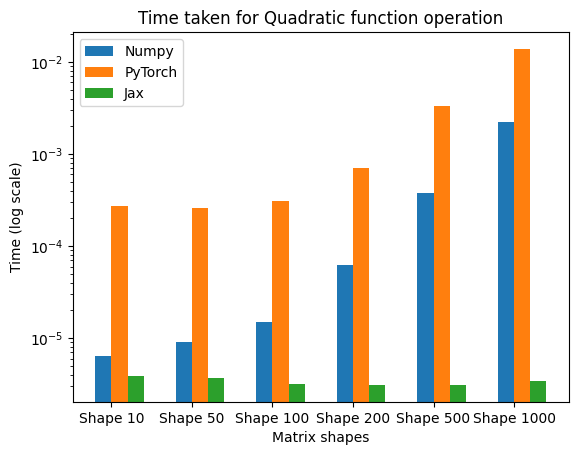

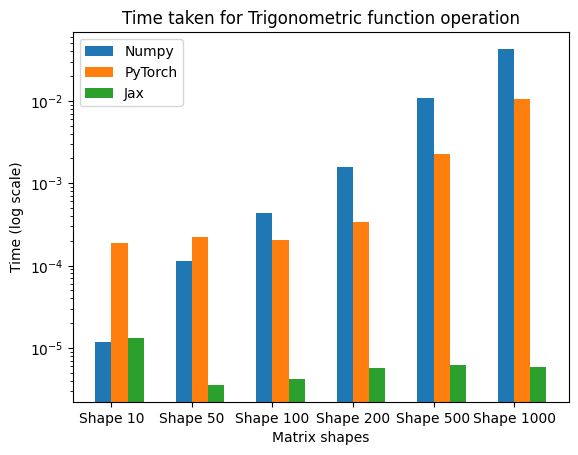

In [60]:
plot_total_times(total_data=result_4_data, matrix_shapes=shapes)

**Выводы**:

`jit` тащит.

### Задание 5* (3 балла)

Теперь попробуем провести сравнение в контексте реальной задачи. Очень кстати у нас есть функция логистической регрессии из предыдущей части. До этого мы использовали явно найденную функцию градиента для реализации, например, градиентного спуска. Теперь же попробуем использовать автоматическое дифференцирование с помощью JAX и PyTorch

В этом задании вам нужно:

- Написать функцию для вычисления значения $f(w)$ (как в задании 2 части 3) с использованием библиотеки PyTorch
- Написать функцию для вычисления значения $f(w)$ (как в задании 2 части 3) с использованием библиотеки JAX. Подсказка: используйте `@jax.jit`
- Удостовериться, что значения написанных функций совпадают со значением функции из задания 2 части 3 в начальной точке
- Написать функции, позволяющие находить значение градиента и гессиана в точке с использованием автоматического дифференцирования из библиотек PyTorch И JAX
- Удостовериться, что значения градиентов и гессианов функций, вычисленных с использованием автоматического дифференцирования, совпадают со значением аналитического градиента и гессиана функции из задания 2 части 3 в начальной точке

### Решение

In [61]:
# ваше решение (code + markdown)

### Задание 6* (4 балла)

Теперь на базе предыдущего задания реализуем градиентный спуск

В этом задании вам нужно:
- Реализовать градиентный спуск, используя функции с автоматическим дифференцированием из PyTorch из предыдущего задания, как класс, унаследованный от `AutomaticSolver` (определён ниже)
- Реализовать градиентный спуск, используя функции с автоматическим дифференцированием из JAX из предыдущего задания, как класс, унаследованный от `AutomaticSolver` (определён ниже)
- Запустить три версии градиентно спуска: с использованием Numpy (задание 3 часть 3), PyTorch и JAX на датасете mushrooms на 500 эпохах и фиксированным шагом (например, $\gamma_k=\frac{1}{L}$). Используйте `check_approx_mush`
- Построить сравнительные графики (как в задании 3 части 3)
- Сделать выводы, в том числе
  - Какой подход оказался самым эффективным? Как определяли эффективность?
  - Какой подход самый удобный с точки зрения пользовательского опыта? Почему?

**Примечание:** Заметьте, что входные и входные данные функции `step()` класса `AutomaticSolver` имеют тип `np.ndarray`. Это сделано для согласования с функцией `check_approx_mush`. В частности это значит, что внутри функции `step()` нужно сделать необходимые преобразования типов

In [62]:
class AutomaticSolver(BaseSolver):
    def __init__(
        self,
        lr: float | Callable,
        f: Callable,
    ) -> None:
        self.f = f
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr

    def step(self, x: np.ndarray, k: int) -> np.ndarray:
        # эту функцию должны переопределить наследуемые классы
        raise NotImplementedError

### Решение

In [63]:
# ваше решение (code + markdown)

**Выводы**
- ...

### Задание 7* (4 балла)

Увеличим ставки и протестируем наши подходе на методе второго порядка - методе Ньютона

В этом задании вам нужно:
- Реализовать метод Ньютона, используя функции с автоматическим дифференцированием из PyTorch из предыдущего задания, как класс, унаследованный от `AutomaticSolver`
- Реализовать метод Ньютона, используя функции с автоматическим дифференцированием из JAX из предыдущего задания, как класс, унаследованный от `AutomaticSolver`
- Запустить три версии метода Ньютона: с использованием Numpy (задание 8 часть 3), PyTorch и JAX на датасете mushrooms на 500 эпохах и фиксированным шагом (например, $\gamma_k=\frac{1}{L}$). Используйте `check_approx_mush`
- Построить сравнительные графики (как в задании 8 части 3)
- Сделать выводы, в том числе
  - Какой подход оказался самым эффективным? Как определяли эффективность?
  - Какой подход самый удобный с точки зрения пользовательского опыта? Почему?

### Решение

In [64]:
# ваше решение (code + markdown)

**Выводы**
- ...

# <a id='day3'></a> День 3 (12 баллов)

## Часть 1. Шаг обучения (12 баллов)

Один из важных аспектов тренировки нейронных сетей с использованием PyTorch — использование `lr_scheduler` (Learning Rate Scheduler). Этот инструмент позволяет динамически изменять скорость обучения во время тренировки модели, что может значительно повлиять на конечные результаты

Используя `lr_scheduler` вместо константного шага, как это обычно делается, помогает достичь большей стабильности обучения, миновать локальные минимумы, а также предотвратить переобучение модели. Однако, требуется тщательная настройка и подбор параметров: в некоторых случаях динамическое изменение скорости обучения может увеличить общее время тренировки модели, особенно если параметры выбраны неверно

В этой части работы вам предстоит попробовать разные варианты scheduler'а и проанализировать их влияние на процесс обучения

### Задание 1 (2 балла)

Для примера, рассмотрим `ExponentialLR`, принимающий единственный параметр - $\gamma$

Так его выглядит формула обновления шага $\eta$ для $k$-той итерации:

$$
\eta_k = \gamma \eta_{k-1}
$$

Заполните функции ниже, чтобы отобразить изменение шага обучения в зависимости от параметра $\gamma$



### Решение

In [65]:
def plot_learning_rates(
    schedulers: list[
        tuple[
            str, Callable[[torch.optim.Optimizer], torch.optim.lr_scheduler.LRScheduler]
        ]
    ],
    start_lr: float,
    steps: int,
    title: str,
):
    model = torch.nn.Linear(1, 1)
    for name, scheduler_lambda in schedulers:
        optimizer = torch.optim.SGD(model.parameters(), lr=start_lr)

        scheduler = scheduler_lambda(optimizer=optimizer)

        lrs = []

        for _ in range(steps):
            lrs.append(scheduler.get_last_lr()[0])

            scheduler.step()

        plt.plot(range(steps), lrs, label=name)

    plt.xlabel("Step")
    plt.ylabel("Learning rate")
    columns = math.ceil(len(schedulers) / 3)
    plt.legend(loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.2 - 0.05 * columns))
    plt.title(title)
    plt.show()

/home/gr/Projects/yandex_studcamp/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


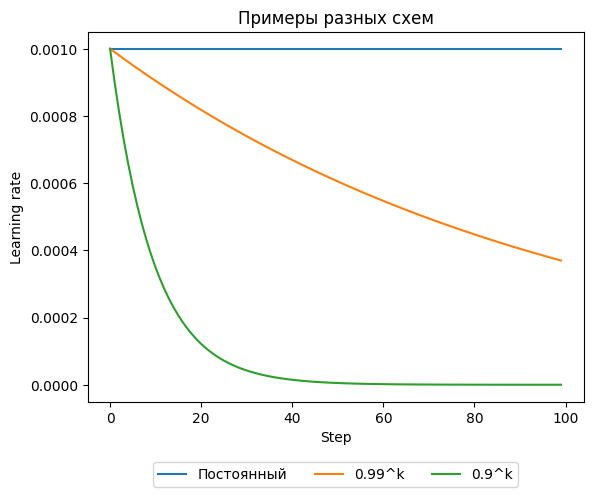

In [66]:
plot_learning_rates(
    [
        ("Постоянный", partial(torch.optim.lr_scheduler.ExponentialLR, gamma=1)),
        ("0.99^k", partial(torch.optim.lr_scheduler.ExponentialLR, gamma=0.99)),
        ("0.9^k", partial(torch.optim.lr_scheduler.ExponentialLR, gamma=0.9)),
    ],
    start_lr=1e-3,
    steps=100,
    title="Примеры разных схем",
)

### Задание 2 (5 баллов)

Используя официальную [документацию](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate), попробуйте **минимум три** любых различных scheduler'a, помимо `ExponentialLR`

Для каждого (кроме, возможно, CyclicLR) напишите формулу обновления шага, как было сделано в предыдущем задании, и постройте график, в котором варьируете параметры scheduler'a (**минимум 4 вариации**). К графикам добавьте соответствующие заголовки и легенды. Используйте функции из предыдущего задания

Для этого задания зафиксируйте `start_lr=100` и `steps=100`

### Решение

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:6: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_195136/3224644285.py:3: SyntaxWarning: invalid escape sequence '\g'
  ("$\gamma=0.1$ и $step\_size=10$", partial(torch.optim.lr_scheduler.StepLR, gamma=0.1, step_size=10)),
/tmp/ipykernel_195136/3224644285.py:4: SyntaxWarning: invalid escape sequence '\g'
  ("$\gamma=0.05$ и $step\_size=50$", partial(torch.optim.lr_scheduler.StepLR, gamma=0.05, step_size=50)),
/tmp/ipykernel_195136/3224644285.py:5: SyntaxWarning: invalid escape sequence '\g'
  ("$\gamma=0.001$ и $step\_size=75$", partial(torch.optim.lr_scheduler.StepLR, gamma=0.001, step_size=75)),
/tmp/ipykernel_195136/32246442

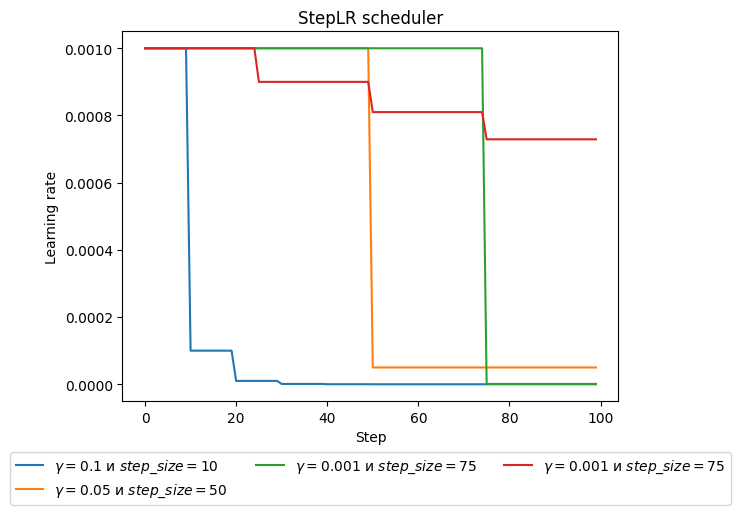

In [67]:
plot_learning_rates(
    [
        (
            "$\gamma=0.1$ и $step\_size=10$",
            partial(torch.optim.lr_scheduler.StepLR, gamma=0.1, step_size=10),
        ),
        (
            "$\gamma=0.05$ и $step\_size=50$",
            partial(torch.optim.lr_scheduler.StepLR, gamma=0.05, step_size=50),
        ),
        (
            "$\gamma=0.001$ и $step\_size=75$",
            partial(torch.optim.lr_scheduler.StepLR, gamma=0.001, step_size=75),
        ),
        (
            "$\gamma=0.001$ и $step\_size=75$",
            partial(torch.optim.lr_scheduler.StepLR, gamma=0.9, step_size=25),
        ),
    ],
    start_lr=1e-3,
    steps=100,
    title="StepLR scheduler",
)

Для ```StepLR```:
$$
\eta_k = \gamma^{\left[\frac{k}{step\_ size}\right]} \cdot \eta_0
$$

Где $\left[ x \right]$ - округление вниз.

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:4: SyntaxWarning: invalid escape sequence '\g'
<>:5: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_195136/2295322544.py:3: SyntaxWarning: invalid escape sequence '\g'
  ("$\gamma=0.1$ и $step\_size=10$", partial(torch.optim.lr_scheduler.LinearLR, start_factor=1, total_iters=100, end_factor=1e-3)),
/tmp/ipykernel_195136/2295322544.py:4: SyntaxWarning: invalid escape sequence '\g'
  ("$\gamma=0.05$ и $step\_size=50$", partial(torch.optim.lr_scheduler.LinearLR, start_factor=0.6, total_iters=100, end_factor=0.1)),
/tmp/ipykernel_195136/2295322544.py:5: SyntaxWarning: invalid escape sequence '\g'
  ("$\gamma=0.001$ и $step\_size=75$", partial(torch.optim.lr_scheduler.LinearLR, start_factor=0.5, total_iters=100, end_factor=1e-4)),


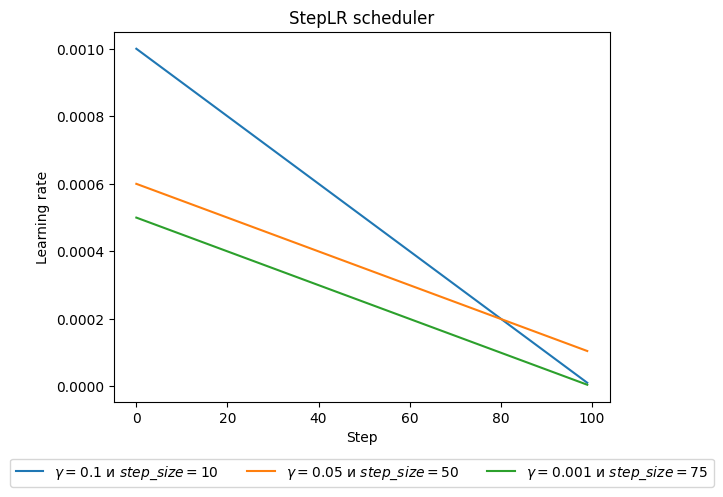

In [68]:
plot_learning_rates(
    [
        (
            "$\gamma=0.1$ и $step\_size=10$",
            partial(
                torch.optim.lr_scheduler.LinearLR,
                start_factor=1,
                total_iters=100,
                end_factor=1e-3,
            ),
        ),
        (
            "$\gamma=0.05$ и $step\_size=50$",
            partial(
                torch.optim.lr_scheduler.LinearLR,
                start_factor=0.6,
                total_iters=100,
                end_factor=0.1,
            ),
        ),
        (
            "$\gamma=0.001$ и $step\_size=75$",
            partial(
                torch.optim.lr_scheduler.LinearLR,
                start_factor=0.5,
                total_iters=100,
                end_factor=1e-4,
            ),
        ),
    ],
    start_lr=1e-3,
    steps=100,
    title="StepLR scheduler",
)

Для `LinearLR`:

$$
\gamma_k = \frac{\gamma_0 - \gamma_n}{\gamma_n} \cdot k + \gamma_0
$$

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_195136/1880609423.py:6: SyntaxWarning: invalid escape sequence '\e'
  ("gamma_k = log_e(1/(k + 1) + \exp)", partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda k: np.log(1/(k+1) + np.e))),


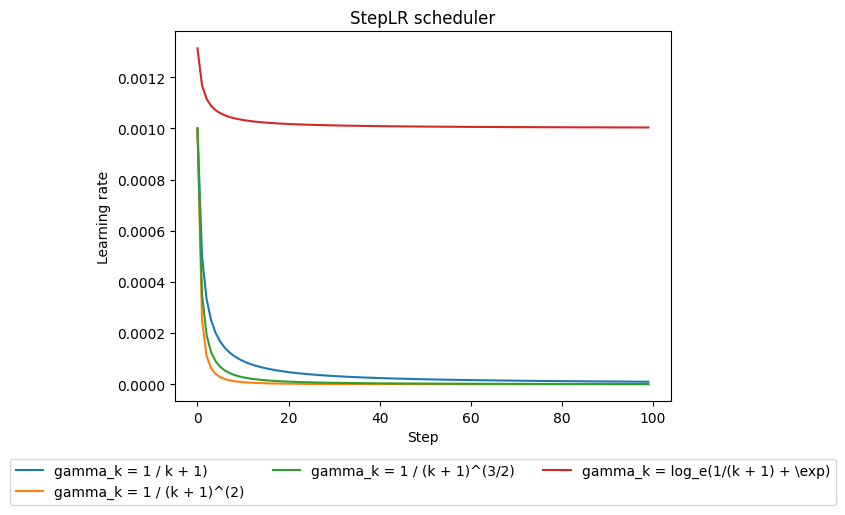

In [82]:
plot_learning_rates(
    [
        (
            "gamma_k = 1 / k + 1)",
            partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda k: 1 / (k + 1)),
        ),
        (
            "gamma_k = 1 / (k + 1)^(2)",
            partial(
                torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda k: 1 / (k + 1) ** 2
            ),
        ),
        (
            "gamma_k = 1 / (k + 1)^(3/2)",
            partial(
                torch.optim.lr_scheduler.LambdaLR,
                lr_lambda=lambda k: 1 / (k + 1) ** (3 / 2),
            ),
        ),
        (
            "gamma_k = log_e(1/(k + 1) + \exp)",
            partial(
                torch.optim.lr_scheduler.LambdaLR,
                lr_lambda=lambda k: np.log(1 / (k + 1) + np.e),
            ),
        ),
    ],
    start_lr=1e-3,
    steps=100,
    title="StepLR scheduler",
)

Все формулы приведены на графике.

### Задание 3 (5 баллов)

Используя официальную [документацию](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate), предложите **минимум 3** различных
схемы выбора шага, которые покажут результат на MNIST лучше, чем предложенные ниже (базовые) схемы

Для начала, закончите функцию `check_schedulers_mnist()` и постройте необходимые графики для базовых схем с помощью функции `plot_lr_loss()`. Вам понадобятся функции `train_mnist()` и `eval_mnist()`

Чтобы удостовериться, что выбранные схемы лучше, воспользуйтесь функцией `check_supremacy()`. Если проверка не проведена или провалена, **задание автоматически считается невыполненным**

Для каждой вашей схемы (кроме, возможно, CyclicLR), напишите явную формулу обновления шага

Постройте следующие графики для всех (базовых + ваших) схем:
- График зависимости ошибки (loss) на тестовых данных от эпохи
- График зависимости точности (accuracy) на тестовых данных от эпохи
- График зависимости шага обучения от эпохи
Используйте функцию `plot_lr_loss()`


Сделайте выводы

In [72]:
plot_lr_loss = partial(
    draw_plots,
    plots=[
        ({"name": "Epoch"}, {"name": "Test Loss", "log": True}),
        ({"name": "Epoch"}, {"name": "Learning Rate"}),
        ({"name": "Epoch"}, {"name": "Accuracy"}),
    ],
)

In [73]:
def check_supremacy(my_data: dict, baseline_data: dict):
    for name, data in my_data.items():
        for b_name, b_data in baseline_data.items():
            if max(b_data["Accuracy"]) >= max(data["Accuracy"]) or min(
                b_data["Test Loss"]
            ) <= min(data["Test Loss"]):
                raise Exception(f"'{name}' does not beat '{b_name}'")

### Решение

In [74]:
EPOCHS = 30

In [75]:
def check_schedulers_mnist(
    schedulers: list[
        tuple[
            str, Callable[[torch.optim.Optimizer], torch.optim.lr_scheduler.LRScheduler]
        ]
    ],
) -> dict:
    start_lr = 1e-2
    epochs = EPOCHS
    results_dict = {}

    for name, scheduler_lambda in schedulers:
        test_losses = []
        accuracies = []
        lrs = []

        torch.manual_seed(420)
        model = MnistModel().to(DEVICE)
        optimizer = torch.optim.SGD(model.parameters(), lr=start_lr)
        scheduler = scheduler_lambda(optimizer)

        with tqdm(range(epochs), desc=name) as loop:
            for _ in loop:
                # train
                train_mnist(model=model, optimizer=optimizer)
                lrs.append(scheduler.get_last_lr())

                # eval
                val_loss, accuracy = eval_mnist(model)

                # log
                test_losses.append(val_loss)
                accuracies.append(accuracy)

                # scheduler step
                scheduler.step()

                loop.set_postfix({"Loss": test_losses[-1], "Accuracy": accuracies[-1]})

        results_dict[name] = {
            "Learning Rate": lrs,
            "Epoch": list(range(epochs)),
            "Test Loss": test_losses,
            "Accuracy": accuracies,
        }

    return results_dict

Baseline: 100%|████████████| 30/30 [00:15<00:00,  1.96it/s, Loss=1.71, Accuracy=0.74]


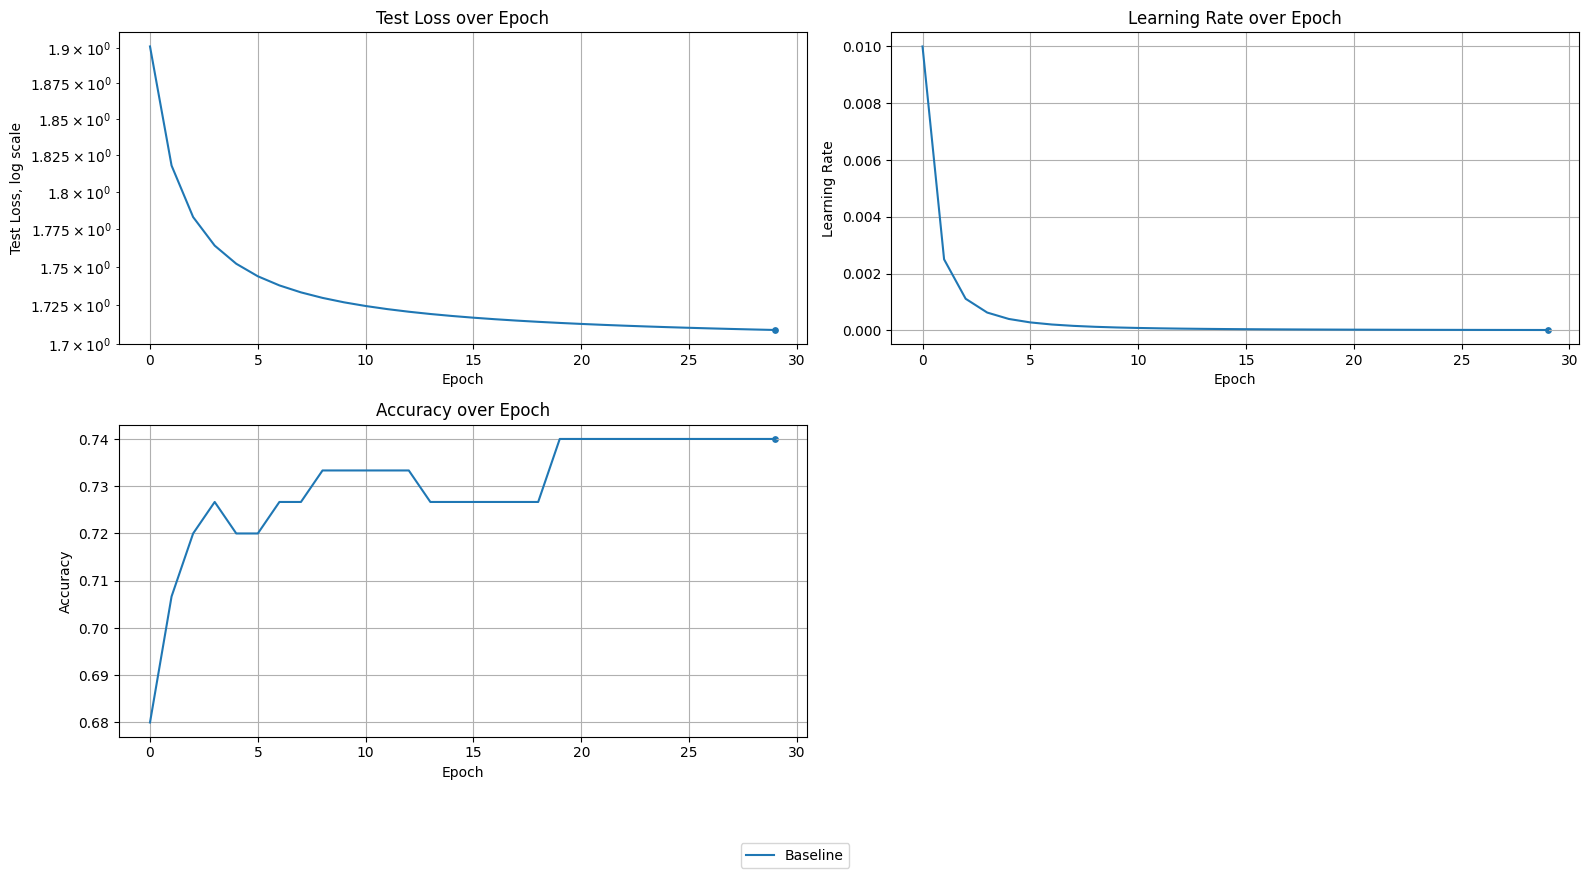

In [76]:
# эту ячейку изменять не нужно!

baseline_data = check_schedulers_mnist(
    [
        (
            "Baseline",
            partial(
                torch.optim.lr_scheduler.LambdaLR,
                lr_lambda=lambda k: 1 / (k + 1) ** 2,
            ),
        ),
    ]
)
plot_lr_loss(baseline_data)

Step learning rate: 100%|█| 30/30 [00:15<00:00,  1.90it/s, Loss=0.739, Accuracy=0.84]
Linear learning rate: 100%|█| 30/30 [00:13<00:00,  2.26it/s, Loss=0.611, Accuracy=0.8
Lambda learning rate: 100%|█| 30/30 [00:14<00:00,  2.03it/s, Loss=1.24, Accuracy=0.76


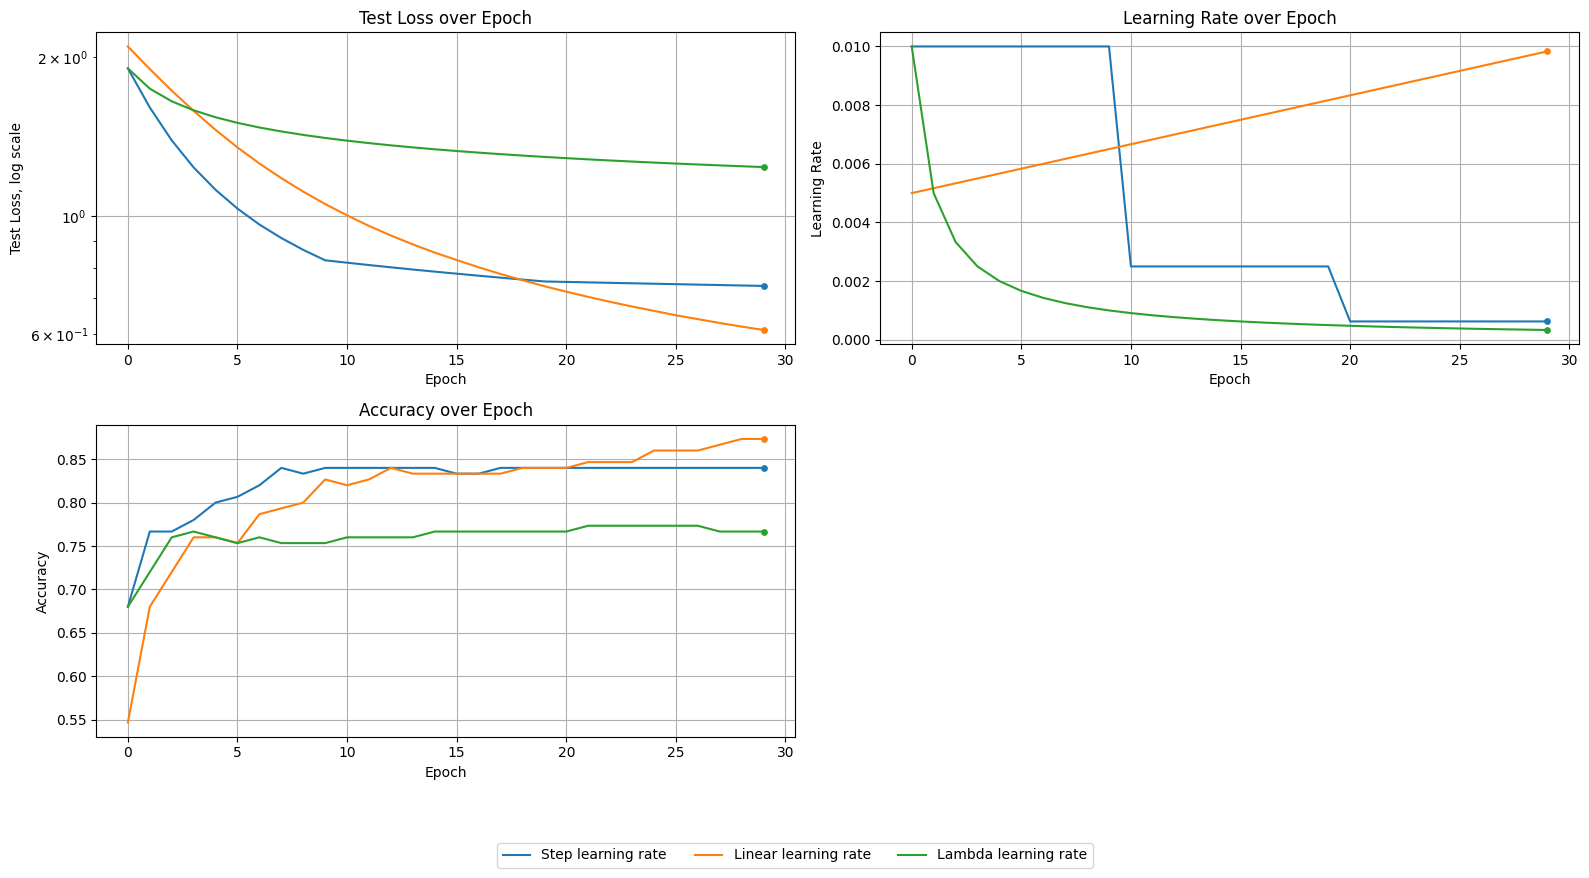

In [79]:
my_data = check_schedulers_mnist(
    [
        (
            "Step learning rate",
            partial(
                torch.optim.lr_scheduler.StepLR,
                step_size=10,
                gamma=0.25,
            ),
        ),
        (
            "Linear learning rate",
            partial(
                torch.optim.lr_scheduler.LinearLR, start_factor=0.5, total_iters=EPOCHS
            ),
        ),
        (
            "Lambda learning rate",
            partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda k: 1 / (k + 1)),
        ),
    ]
)
plot_lr_loss(my_data)

Формулы обновления шага представлены выше.

In [80]:
# Проверка должна завершиться без ошибок
check_supremacy(my_data=my_data, baseline_data=baseline_data)

**Выводы**

Судя по ```Step learning rate``` можно сказать, что изначальный ```learning_rate``` слишком маленький (или маленькое количество эпох), можно проверить это, если использовать константный и большой шаг обучения.

Increese LR * 5: 100%|███| 30/30 [00:15<00:00,  1.95it/s, Loss=0.393, Accuracy=0.933]


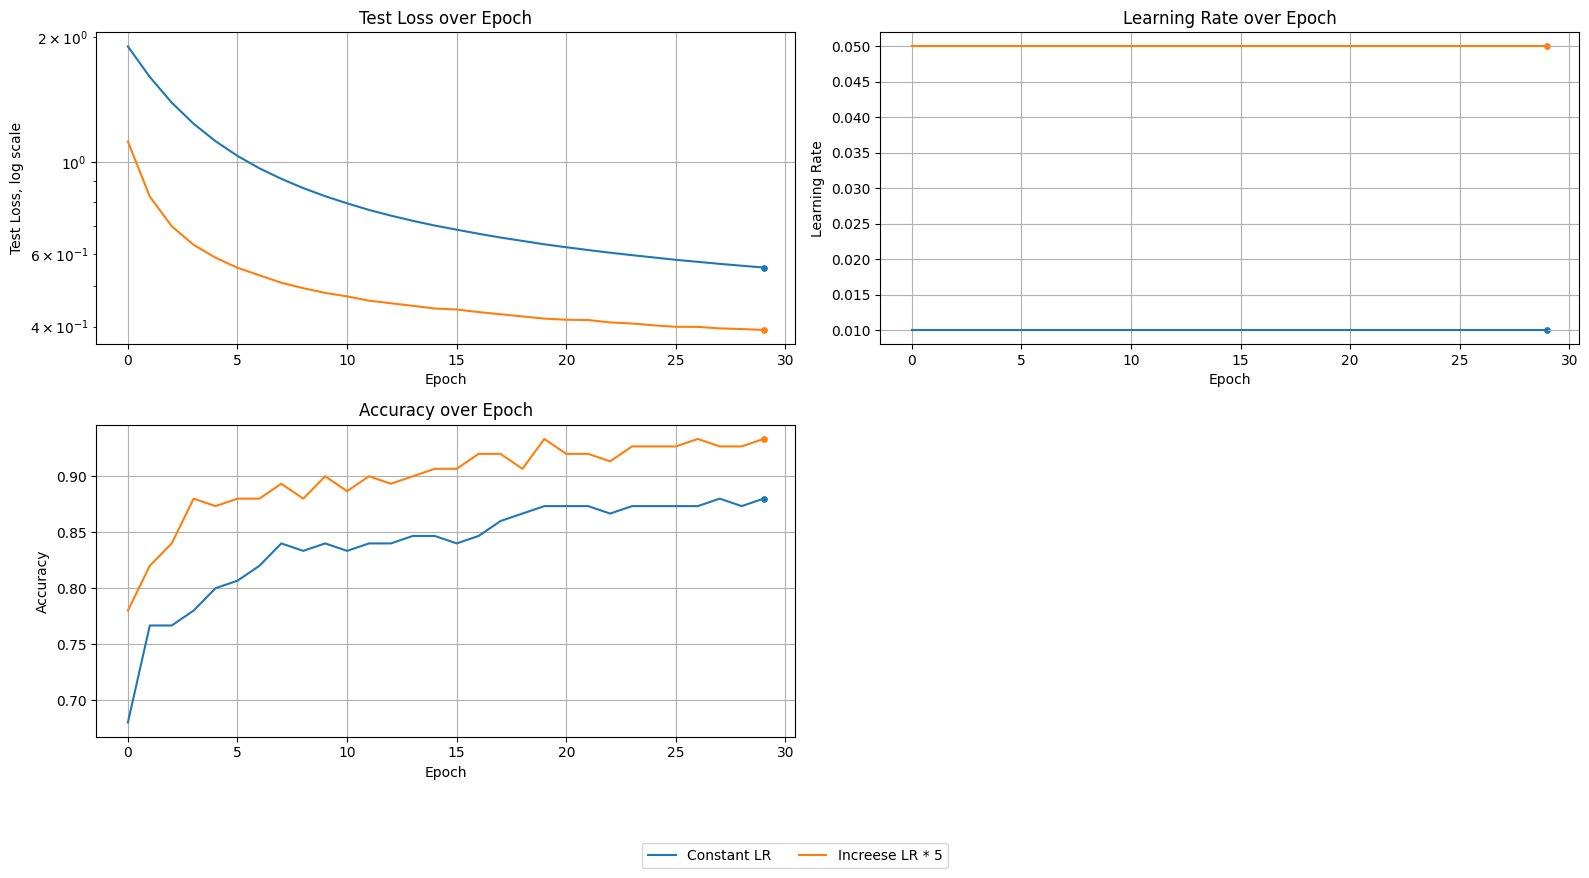

In [81]:
constant_lr_data = check_schedulers_mnist(
    [
        (
            "Constant LR",
            partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda x: 1),
        ),
        # (
        #     "Increese LR * 1.25",
        #     partial(
        #         torch.optim.lr_scheduler.LambdaLR,
        #         lr_lambda=lambda x: 1.25
        #     ),
        # ),
        # (
        #     "Increese LR * 1.5",
        #     partial(
        #         torch.optim.lr_scheduler.LambdaLR,
        #         lr_lambda=lambda x: 1.5
        #     ),
        # ),
        # (
        #     "Increese LR * 2",
        #     partial(
        #         torch.optim.lr_scheduler.LambdaLR,
        #         lr_lambda=lambda x: 2
        #     ),
        # ),
        # (
        #     "Increese LR * 3",
        #     partial(
        #         torch.optim.lr_scheduler.LambdaLR,
        #         lr_lambda=lambda x: 3
        #     ),
        # ),
        (
            "Increese LR * 5",
            partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda x: 5),
        ),
    ]
)
plot_lr_loss(constant_lr_data)

Теперь кажется, что 30 эпох для модели недостаточно и нужно увеличивать количество эпох или повысть `lr`.

# <a id='day4'></a> День 4 (12 + 19 баллов)

## Часть 1. Больше адаптивных методов (12 + 19 баллов)

### Задание 1 (8 баллов)

Обратимся к понятиям **L2-регуляризация** (L2 Regularization) и **затухание весов** (weight decay). Обе эти техники используются дле предотвращения переобучения, накладывая штраф на большие значения весов. Сначала рассмотрим эти техники на примере стандартного SGD.

Пускай $x$ - тренируемые веса модели, $\mathcal{L}_{error}$ - ошибка полученная из функции потерь, $\mathcal{L}$ - общая ошибка (total loss), которая используется для обновления весов, $\eta$ - шаг обучения, и $\lambda$ - гиперпараметр, определяющий силу штрафа. Тогда в случае знакомой L2-регуляризации, имеем

$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} + \lambda \|x\|^2 \\
& x = x - \eta \frac{\partial \mathcal{L}}{\partial x} - \eta \lambda x
\end{align*}
$$

При использовании затухания весов член $\eta \lambda x$ просто вычитается из текущих весов $x$. Другими словами

$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} \\
& x = x - \eta \frac{\partial \mathcal{L}}{\partial x} - \eta \lambda x
\end{align*}
$$

Кажется, результат один и тот же. Значит ли это, что L2-регуляризация == затухание весов? Нет! Давайте рассмотрим эти же техники, но уже для алгоритма SGD с моментумом.

L2-регуляризация:
$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} + \lambda \|x\|^2 \\
& h_k = \beta h_{k-1} + (1-\beta)(\frac{\partial \mathcal{L}}{\partial x} + \lambda x) \\
& x = x - \eta h_k = x - \eta \left( \beta h_{k-1} - (1-\beta)\frac{\partial \mathcal{L}}{\partial x} \right)
- \eta (1-\beta) \lambda x
\end{align*}
$$

Затухание весов:
$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} \\
& h_k = \beta h_{k-1} + (1-\beta)\frac{\partial \mathcal{L}}{\partial x}\\
& x = x - \eta h_k = x - \eta \left( \beta h_{k-1} - (1-\beta)\frac{\partial \mathcal{L}}{\partial x} \right)
- \eta \lambda x
\end{align*}
$$

Обратите внимание на последние члены в последних строках: в случае L2-регуляризации член затухания весов
$\eta \lambda x$ дополнительно умножается на $(1-\beta)$. Согласитесь, размер штрафа уже не такой интуитивный

Очевидно, всё становится ещё запутаннее, если взять метод посложнее - популярный Adam, например.

L2-регуляризация ([официальная реализация](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) Adam в PyTorch):
$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} + \lambda \|x\|^2 \\
& m_k = \frac{1}{1-\beta_1^k} \left( \beta_1 m_{k-1} + (1-\beta_1)(\frac{\partial \mathcal{L}}{\partial x} + \lambda x) \right)
 \\
& v_k =\frac{1}{1-\beta_2^k} \left( \beta_2 v_{k-1} + (1-\beta_2)(\frac{\partial \mathcal{L}}{\partial x} + \lambda x)^2 \right) \\
& x = x - \eta \frac{m_k}{\sqrt{v_k} + \epsilon}
\end{align*}
$$

Затухание весов:
$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} \\
& m_k = \frac{1}{1-\beta_1^k} \left( \beta_1 m_{k-1} + (1-\beta_1)\frac{\partial \mathcal{L}}{\partial x} \right)
 \\
& v_k =\frac{1}{1-\beta_2^k} \left( \beta_2 v_{k-1} + (1-\beta_2)(\frac{\partial \mathcal{L}}{\partial x})^2 \right) \\
& x = x - \eta \frac{m_k}{\sqrt{v_k} + \epsilon} - \eta \lambda x
\end{align*}
$$

В случае L2-регуляризации очень сложно выделить член, который отвечает за контроль весов - к нему примешивается слишком много других параметров. Однако в случае с затуханием весов всё предельно ясно

Однозначного ответа на вопрос "Что лучше - L2-регуляризация или затухание весов?" нет. Однако всё-таки иногда хочется более корректно контролировать штрафной член, а значит - необходимо модифицировать Adam

В этом задании вам нужно:
1. Дописать функцию `check_optimizers_mnist()`, которая в дальнейшем будет использоваться для тестирования алгоритмов на датасете MNIST
2. Реализовать метод Adam c затуханием весов, используя `torch.optim.Optimizer` (вспомните Семинар 10). Ниже приведён каркас класса с необходимыми гиперпараметрами и некоторыми полезными функциями
3. Проверить работоспособность метода с помощью функции `check_optimizers_mnist()`. Количество эпох оставьте равным 10
4. Построить сравнительные графики получившегося метода, SGD и Adam из библиотеки PyTorch с помощью функции `plot_optim_loss()`
5. Сделайте выводы

In [ ]:
plot_optim_loss = partial(
    draw_plots,
    plots=[
        ({"name": "Epoch"}, {"name": "Test Loss", "log": True}),
        (
            {"name": "Time", "axis_name": "Running time, seconds", "ref": "Time"},
            {"name": "Test Loss", "log": True},
        ),
        ({"name": "Epoch"}, {"name": "Accuracy"}),
        (
            {"name": "Time", "axis_name": "Running time, seconds", "ref": "Time"},
            {"name": "Accuracy"},
        ),
    ],
)

### Решение

In [ ]:
def check_optimizers_mnist(
    optimizers: list[
        tuple[str, Callable[[Iterator[nn.Parameter]], torch.optim.Optimizer]]
    ],
    epochs: int = 10,
) -> dict:
    results_dict = {}

    for name, optimizer_lambda in optimizers:
        test_losses = []
        accuracies = []
        time_logs = []

        torch.manual_seed(420)
        model = MnistModel().to(DEVICE)
        optimizer = optimizer_lambda(model.parameters())

        # initial eval
        ... # TODO

        # log
        ... # TODO

        torch.cuda.synchronize()
        start_time = time.time()

        with tqdm(range(epochs), desc=name) as loop:
            for _ in loop:
                # train
                # ОБЯЗАТЕЛЬНО сохраним граф вычислений, используя create_graph=True
                train_mnist(.., ..., create_graph=True) # TODO

                # eval
                ... # TODO

                # log
                ... # TODO

                torch.cuda.synchronize()
                time_logs.append(time.time() - start_time)
                loop.set_postfix({"Loss": ..., "Accuracy": ...}) # TODO

        results_dict[name] = {
            "Epoch": list(range(epochs + 1)),
            "Time": time_logs,
            "Test Loss": test_losses,
            "Accuracy": accuracies,
        }

    return results_dict

In [ ]:
# это просто шаблон - можете переименовать его или удалить
class Template3(torch.optim.Optimizer):
    def __init__(
        self,
        params,
        lr=1e-3,
        betas=(0.9, 0.999),
        eps=1e-8,
        weight_decay: float = 1e-2,
    ):
        super(Template3, self).__init__(
            params,
            defaults={
                "lr": lr,
                "betas": betas,
                "eps": eps,
                "weight_decay": weight_decay,
            },
        )

        ...  # TODO

    @torch.no_grad()
    def step(self): ...  # TODO

In [ ]:
# ваше решение (code)

### Задание 2* (7 баллов)

Большинство адаптивных (и не только) методов оптимизации могут быть записаны в виде

$$
x_{k+1} = x_k -\eta_k \hat{D}^{-1}_k m_k,
$$
где $\eta_k$ - шаг обучения, $\hat{D}_k$ - так называемая матрица предобусловленности, а $m_k$ - либо градиент (аппроксимация градиента), либо первый момент градиента с параметром импульса $\beta_1$, либо скорректированный по смещению первый момент градиента.
Простая интерпретация заключается в том, что вектор $m_k$ поворачивается и масштабируется на величину, обратную матрице предобусловленности $\hat{D}_k$. Полученное направление берётся как направление обновления.

Звучит немного сложновато, но все адаптивные методы, с которыми вы встречались до этого момента имеют такой вид (вспомните Семинар 10). Например, в случае AdaGrad мы имеем

$$
\begin{align*}
& m_k = g_k \\
& \hat{D}_k = \sqrt{\sum_{i=1}^k \text{diag} (g_k \odot g_k)}
\end{align*}
$$

Для RMSProp параметры принимают вид

$$
\begin{align*}
& m_k = g_k \\
& \hat{D}_k = \sqrt{\beta_2  \hat{D}^{2}_{k-1} + (1-\beta_2) \text{diag} (g_i \odot g_i)}
\end{align*}
$$

В алгоритме Adam модифицируется и $m_k$:

$$
\begin{align*}
& m_k = \frac{(1-\beta_1)\sum_{i=1}^k\beta_1^{k-i}g_i}{1-\beta_1^k} \\
& \hat{D}_k = \sqrt{\frac{(1-\beta_2)\sum_{i=1}^k\beta_2^{k-i}\text{diag} (g_i \odot g_i)}{1-\beta_2^k} }
\end{align*}
$$


Легко заметить, что для подсчёта $\hat{D}_k$ все вышеперечисленные методы используют $\text{diag} (g_k \odot g_k)$, то есть используют градиент (аппроксимацию) чтобы учитывать кривизну функции и потенциально ускорять сходимость. В следующих нескольких заданиях мы предлагаем вам пойти дальше и попробовать использовать информацию о производной второго порядка (гессиане) для оптимизации процесса обучения

Будем использовать метод Хатчинсона для аппроксимации следа гессиана $v_k$ функции:

$$
v_k = \text{diag} (z_k \odot H_k z_k),
$$
где $H_k$ - гессиан функции $f(x_k)$, а $z_k$ - случайный вектор с определенными статистическими свойствами. В методе Хатчинсона случайный вектор $z_k$ обычно берется из распределения с нулевым математическим ожиданием и единичной дисперсией, например, из распределения Радемахера, элементы которого принимают значения +1 или -1 с равной вероятностью (0.5). Более того, для лучшей точности мы можем применить этот метод несколько раз, скажем $n$. Тогда

$$
v_k = \frac{1}{n} \sum_{i=1}^n \text{diag} (z_i \odot H_k z_i).
$$

Заметьте, что в данном случае нас не интересует гессиан сам по себе, а только его произведение на вектор $z_k$. Это важный момент, так как нам не нужно строить непосредственно гессиан (что потребовало бы обращения матрицы, а это довольно затратная операция). К счастью, `torch.autograd.grad` позволяет эффективно вычислить $H_k z_k$ без вычисления гессиана


В этом задании вам нужно сделать следующее:
1. Дописать функцию `rademacher()`, которая генерирует случайные вектора из распределения Радемахера
2. Дописать функцию `hutchinson_approximation()`, которая реализует метод Хатчинсона

Для проверки реализаций используйте функции `check_hutchinson()` и `check_rademacher()`. Если проверки не проведены или провалены, **задание автоматически считается невыполненным**


In [ ]:
def check_hutchinson(hutchinson_approximation: Callable):
    a = torch.tensor([2.0, 3.0], requires_grad=True).to(DEVICE)
    b = torch.tensor([6.0, 4.0], requires_grad=True).to(DEVICE)
    q = 3 * a**3 - b**2

    params = [a, b]
    grads = torch.autograd.grad(q.sum(), [a, b], create_graph=True)

    res = hutchinson_approximation(
        params,
        grads,
        n_iterations=1,
        generator=torch.Generator(device=DEVICE).manual_seed(420),
    )
    res = [el for x in res for el in x.clone().detach().cpu().tolist()]
    assert np.allclose(res, [36.0, 54.0, -2.0, -2.0])

    grads = torch.autograd.grad(q.sum(), [a, b], create_graph=True)
    res = hutchinson_approximation(
        params,
        grads,
        n_iterations=5,
        generator=torch.Generator(device=DEVICE).manual_seed(420),
    )
    res = [el for x in res for el in x.clone().detach().cpu().tolist()]
    assert np.allclose(res, [7.2, 10.8, -0.4, -0.4])


def check_rademacher(rademacher: Callable):
    for i in range(1, 15):
        assert rademacher(i).shape == (i,)

### Решение

In [ ]:
def rademacher(
    shape, generator: Optional[torch.Generator] = None, device: torch.device = DEVICE
) -> torch.Tensor:
    """Распределение Радемахера

    Args:
        shape: требуемая размерность вектора
        generator: используется для воспроизводимости результатов

    Returns:
        torch.Tensor
    """
    ...  # TODO


check_rademacher(rademacher)

Так как обычно в моделях больше одного тренируемого параметра, мы хотим получать аппроксимацию
для целого списка параметров, чему соответствует сигнатура нижеприведённой функции

Для эффективного подсчёта $H_k z_k$ используйте следующую конструкцию

```python
h_zs = torch.autograd.grad(
            grads,
            params,
            grad_outputs=zs,
            only_inputs=True,
            retain_graph=i < n_iterations - 1,
        )
```
где `zs` - список векторов из распределения Радемахера


In [ ]:
def hutchinson_approximation(
    params: list[torch.Tensor],
    grads: list[torch.Tensor],
    n_iterations: int = 1,
    generator=None,
) -> list[torch.Tensor]:
    """Аппроксимация по методу Хатчинсона

    Args:
        params: тренируемые параметры
        grads: градиенты тренируемых параметров
        n_iterations: количество применений метода
        generator: используется для воспроизводимости результатов (нужно передать в rademacher())

    Returns:
        list[torch.Tensor]: где i-й элемент является аппроксимацией для i-го параметра
    """

    ...  # TODO


check_hutchinson(hutchinson_approximation)

### Задание 3* (9 баллов)



Теперь, когда все компоненты готовы, можно реализовать непосредственно метод. За основу возьмём идею Adam: метод будет иметь форму $x_{k+1} = x_k -\eta_k \hat{D}^{-1}_k m_k$, где

$$
\begin{align*}
& m_k = \frac{(1-\beta_1)\sum_{i=1}^k\beta_1^{k-i}g_i}{1-\beta_1^k} \\
& \hat{D}_k = \sqrt{\frac{(1-\beta_2)\sum_{i=1}^k\beta_2^{k-i}v_i^2}{1-\beta_2^k} }
\end{align*}
$$

В этом задании вам нужно:
1. Реализовать описанный выше метод с помощью `torch.optim.Optimizer` (вспомните Семинар 10). Ниже приведён каркас класса с необходимыми гиперпараметрами и некоторыми полезными функциями
2. Проверить работоспособность метода с помощью функции `check_optimizers_mnist()`. Количество эпох оставьте равным 10
3. Построить необходимые графики с помощью приведённой ниже функции `plot_optim_loss()`



### Решение

In [ ]:
# это просто шаблон - можете переименовать его или удалить
class Template1(torch.optim.Optimizer):
    def __init__(
        self,
        params,
        lr=1e-3,
        betas=(0.9, 0.999),
        eps=1e-8,
        n_samples: int = 1,
    ):
        super(Template1, self).__init__(
            params,
            defaults={
                "lr": lr,
                "betas": betas,
                "eps": eps,
            },
        )

        self.n_samples = n_samples

        # генератор для воспроизводимости (для метода Хатчинсона)
        self.generator = torch.Generator(device=DEVICE).manual_seed(420)

        ...  # TODO

    def get_params(self):
        return [
            p for group in self.param_groups for p in group["params"] if p.requires_grad
        ]

    @torch.no_grad()
    def zero_and_set_hessians(self):
        # Занулим Гессианы
        for p in self.get_params():
            hess = self.state[p]["hess"]
            if not isinstance(hess, float):
                hess.zero_()

        params = [p for p in self.get_params() if p.grad is not None]
        if len(params) == 0:
            return

        grads = [p.grad for p in params]

        # Считаем Гессианы
        ...  # TODO

    @torch.no_grad()
    def step(self):
        self.zero_and_set_hessians()

        ...  # TODO

In [ ]:
# ваше решение (code)

### Задание 4 (4 балла)

Пришло время попробовать реализованные методы на чём-то более сложном, чем MNIST

В этом задании вам нужно:
1. Дописать функцию `check_optimizers_cifar()`, которая в дальнейшем будет использоваться для тестирования алгоритмов на датасете CIFAR-10. Используйте функции `train_cifar()` и `eval_cifar()`
2. Протестировать методы, реализованные в этой части, с разными гиперпараметрами (для каждого **минимум 3 вариации**). Обязательно
    - Для метода из задания 1 попробовать разные weight_decay
    - **Если делали задание 3**, для метода из задания 3 попробовать разное количество итераций метода Хатчинсона
    - **Если не делали задание 3**, возьмите на выбор один из следующих методов из стандартной библиотеки PyTorch: AdaGrad, RMSProp, SGD с nesterov=True
При тестировании зафиксировать `model_class=CifarNet` и `epochs=20`
3. Построить необходимые графики для каждого метода с помощью функции `plot_optim_loss()`
4. Построить один общий график, где показать методы с лучшими гиперпараметрами, с помощью функции `plot_optim_loss()`. Объяснить, по каким критериям выбирались "лучшие" гиперпараметры
5. Сделать выводы

### Решение

In [ ]:
def check_optimizers_cifar(
    optimizers: list[
        tuple[str, Callable[[Iterator[nn.Parameter]], torch.optim.Optimizer]]
    ],
    epochs: int = 20,
    model_class: Callable[[], nn.Module] = CifarNet,
) -> dict:
    results_dict = {}

    for name, optimizer_lambda in optimizers:
        test_losses = []
        accuracies = []
        time_logs = []

        torch.manual_seed(420)
        model = model_class().to(DEVICE)
        optimizer = optimizer_lambda(model.parameters())

        # initial eval
        ... # TODO

        # log
        ... # TODO

        torch.cuda.synchronize()
        start_time = time.time()

        with tqdm(range(epochs), desc=name) as loop:
            for _ in loop:
                # train
                # ОБЯЗАТЕЛЬНО сохраним граф вычислений, используя create_graph=True
                train_cifar(.., ..., create_graph=True) # TODO

                # eval
                ... # TODO

                # log
                ... # TODO

                torch.cuda.synchronize()
                time_logs.append(time.time() - start_time)
                loop.set_postfix({"Loss": ..., "Accuracy": ...}) # TODO


        results_dict[name] = {
            "Epoch": list(range(epochs + 1)),
            "Time": time_logs,
            "Test Loss": test_losses,
            "Accuracy": accuracies,
        }

    return results_dict

In [ ]:
# ваше решение (code + markdown)

**Выводы**
- ...

### Задание 5* (3 балла)

В этом задании вам нужно:
1. Провести те же тесты, что и в предыдущем задании, только теперь зафиксировать `model_class=ResNet` и `epochs=6`
2. Сделать выводы, в том числе принимая во внимание результаты предыдущего задания

### Решение

In [ ]:
# ваше решение (code + markdown)

# <a id='day5'></a> День 5 (6 + 17 баллов). CVXPY

## Часть 1. Разминочная задачка (6 баллов)

### Задание 1 (6 баллов)
Дана некая матрица $B = x_1A_1 + x_2A_2 + ... + x_n A_n$. То есть, матрица $B$ - линейная комбинация матриц $A_i$. В этом задании мы попробуем решить задачу поиска коэффициентов $x_i$ используя библиотеку CVXPY. \
Пусть $A,B \in R^{\,p \times q}, n = 6, p = 10, q = 30$\
Вам нужно:
1. Сформулировать задачу как задачу минимизации
3. Решить сгенерированную нами задачу используя библиотеку CVXPY, вывести и проверить ответ
4. Добавить ограничение: $||x||_2 \leq 3$. Решить ту же задачу, что раньше, но с новым ограничением. Вывести и проверить ответ

### Решение

Cформулируем задачу оптимизации:
$$\min_{x_1, x_2, ..., x_6} ||B - (x_1 A_1 + x_2 A_2 + ... + x_6 A_6)||_F$$

In [97]:
def get_n_matrices(n, p, q, random_generator, a=0, b=1):
    if n == 1:
        return random_generator.uniform(low=0, high=1, size=(p, q)).astype(np.float32)
    return [
        random_generator.uniform(low=0, high=1, size=(p, q)).astype(np.float32)
        for _ in range(n)
    ]

In [101]:
# random_state = 42
# random_generator = np.random.RandomState(random_state)

# B = get_n_matrices(n=1, p=10, q=30, random_generator=random_generator)
# A = get_n_matrices(n=6, p=10, q=30, random_generator=random_generator)

x = cp.Variable(6)

In [102]:
n = 6
p = 10
q = 30
A_i = []
for i in range(n):
    A_i.append(np.random.randn(p, q))

B = np.zeros((p, q))
for i in range(n):
    B += (np.random.rand() * 6 - 3) * A_i[i]

In [104]:
obj = cp.norm(
    (
        B
        - (x[0] * A_i[0]
        + x[1] * A_i[1]
        + x[2] * A_i[2]
        + x[3] * A_i[3]
        + x[4] * A_i[4]
        + x[5] * A_i[5])
    ),
    "fro",
)

In [105]:
prob = cp.Problem(cp.Minimize(obj))
prob.solve()

print(f"Минимум = {prob.value}")
print(f"Оптимальный вектор x: {x.value}")

Минимум = 1.4771336127787615e-14
Оптимальный вектор x: [ 1.99899789 -0.56320607 -2.14384    -1.81326475 -1.83804753  2.63752544]


И снова сформулируем задачу оптимизации:
$$\begin{cases} \min_{x_1, x_2, ..., x_6} ||B - (x_1 A_1 + x_2 A_2 + ... + x_6 A_6)||_F  \\ ||x||_{2} \le 3 \end{cases}$$

In [106]:
prob = cp.Problem(cp.Minimize(obj), constraints=[cp.norm(x, 2) <= 3])

prob.solve()

print(f"Минимум = {prob.value}")
print(f"Оптимальный вектор x: {x.value}")

Минимум = 30.101566940510924
Оптимальный вектор x: [ 1.23455823 -0.40107614 -1.2924457  -1.08124687 -1.21739321  1.73015808]


In [108]:
# prob = cp.Problem(
#     cp.Minimize(obj),
#     constraints=[cp.norm(x, 'fro') <= 4]
# )

# try:
#     prob.solve()
#     print(f'Минимум = {prob.value}')
#     print(f'Оптимальный вектор x: {x.value}')

# except cp.DCPError:
#     print('Не выполняются критерии DCP.')